# Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['red', 'blue'])
cmap2 = ListedColormap(['orange', 'cyan'])
%matplotlib inline

## XOR problem

input: x1, x2

hidden units: z1, z2, z3, z4

output: y

In [4]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

y = np.array([0, 1, 1, 0])

d = 2 # number of input dims
N = 4 # number of input instances

h = 3 # number of neurons hidden layer 
o = 1 # number of neurons output layer 

params = {
    'W1': np.random.normal(0, 1, size=(h, d)),
    'b1': np.random.normal(0, 1, size=(h, 1)),
    'W2': np.random.normal(0, 1, size=(o, h)),
    'b2': np.random.normal(0, 1, size=(o, 1)),
}

params

{'W1': array([[-0.0634214 , -1.20311364],
        [ 1.43292785,  1.14868169],
        [-0.52647063, -0.75249709]]),
 'b1': array([[ 1.59542064],
        [-1.4158996 ],
        [-0.7356011 ]]),
 'W2': array([[-1.78718406,  1.18436011,  0.16138298]]),
 'b2': array([[1.05501036]])}

Forward pass  
\begin{align*}
    \mathbf{z} &= \text{sigmoid}(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1)\\
    y &= \text{sigmoid}(\mathbf{W}_2 \mathbf{z} + \mathbf{b}_2)
\end{align*}
with binary cross entropy loss 
$$
    L = \frac{1}{N} \sum_i - y_i \log \hat{y}_i - (1 - y_i) \log (1- \hat{y}_i)
$$
The parameter update for the first layer $\mathbf{W}_1$ is: 
\begin{align*}
    \Delta \mathbf{W}_1 &= \eta \cdot \mathbf{x} \cdot ((y - \hat{y}) \cdot \mathbf{W}_2^T \mathbf{z} (1 - \mathbf{z}))^T \\
    \Delta \mathbf{W}_1 &= \eta \cdot 
    \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
    \left((y - \hat{y}) 
    \begin{bmatrix} W_2^{1} \\ W_2^{2} \\ W_2^{3} \\ W_2^{4} \end{bmatrix} \times
    \begin{bmatrix} 
        z_1 (1 - z_1) \\ 
        z_2 (1 - z_2) \\ 
        z_3 (1 - z_3) \\ 
        z_4 (1 - z_4) 
    \end{bmatrix} \right)^T\\
    \Delta \mathbf{W}_1 &= \eta \cdot (y - \hat{y})
    \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
    \left( 
    \begin{bmatrix} W_2^{1} \\ W_2^{2} \\ W_2^{3} \\ W_2^{4} \end{bmatrix} \times
    \begin{bmatrix} 
        z_1 (1 - z_1) \\ 
        z_2 (1 - z_2) \\ 
        z_3 (1 - z_3) \\ 
        z_4 (1 - z_4) 
    \end{bmatrix} \right)^T\\
    \Delta \mathbf{W}_1 &= \eta \cdot (y - \hat{y})
    \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
    \begin{bmatrix} W_2^{1} z_1 (1 - z_1) & W_2^{2} z_2 (1 - z_2)& W_2^{3} z_3 (1 - z_3)& W_2^{4} z_4 (1 - z_4) \end{bmatrix}\\
    \Delta \mathbf{W}_1 &= \eta \cdot (y - \hat{y})
    \begin{bmatrix} 
        x_1 W_2^{1} z_1 (1 - z_1) & x_1 W_2^{2} z_2 (1 - z_2) & x_1 W_2^{3} z_3 (1 - z_3) & x_1 W_2^{4} z_4 (1 - z_4) \\
        x_2 W_2^{1} z_1 (1 - z_1) & x_2 W_2^{2} z_2 (1 - z_2) & x_2 W_2^{3} z_3 (1 - z_3) & x_2 W_2^{4} z_4 (1 - z_4) 
    \end{bmatrix}\\
    \Delta \mathbf{W}_1 &= \eta \cdot ((y - \hat{y}) \odot \mathbf{W}_2^T \odot \mathbf{z}(1 - \mathbf{z})) \mathbf{x} \\
\end{align*}
Where $\odot$ is the Hamadard element-wise multiplication

In [5]:
def sigmoid(X: np.ndarray):
    return 1/(1+np.exp(-X))

def feedforward(X, W1, b1, W2, b2):
    Z = sigmoid(W1 @ X.T + b1)
    y = sigmoid(W2 @ Z + b2)
    return Z, y

def cross_entropy(y, y_pred):
    return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)

eta = 1.5

for _ in range(100):

    Z, y_pred = feedforward(X, **params)
    err = cross_entropy(y, y_pred)
    print(err.sum())

    W1_d = eta * ((y - y_pred) * params['W2'].T * (Z * (1-Z))) @ X
    b1_d = eta * np.sum(((y - y_pred) * params['W2'].T * (Z * (1-Z))), axis=1)
    W2_d = eta * np.sum((y - y_pred) * Z, axis=1)
    b2_d = eta * np.sum(y - y_pred)

    params['W1'] += W1_d
    params['b1'] += b1_d[..., None]
    params['W2'] += W2_d[..., None].T
    params['b2'] += b2_d

Z, y_pred = feedforward(X, **params)
err = cross_entropy(y, y_pred)
print(err.sum())

2.9425741264691716
3.100676421981587
3.7984243658343186
4.977465724795386
5.470815647009689
4.275388341245412
4.2135609193841725
3.458664056391632
3.3292899035138195
3.1207419627446753
3.0451361457964494
2.957194336455222
2.9134365269096065
2.8688475254455117
2.8421843300308383
2.8170870246228445
2.7999674046085907
2.784410060995003
2.7724619668772434
2.761478591294008
2.7519638380398757
2.742787004228072
2.733932119480034
2.7249045565876826
2.7155285339779787
2.7055638795020993
2.694774482437136
2.6829622026109803
2.6698255201591707
2.655075150902579
2.638320793735516
2.619119490382155
2.5969788752861485
2.5712814350776694
2.5414235092320467
2.506622718166909
2.4662063942586308
2.4193441183664675
2.3655224183954253
2.3042289718622184
2.235726741590604
2.160567408705861
2.0813597312124332
2.001194980450584
1.9309350865796622
1.8788893614766278
1.888780289463498
1.9479098200417253
2.196622931303801
2.219737719209384
2.567437569443305
1.9607368966140972
1.956607477212701
1.67470420890779

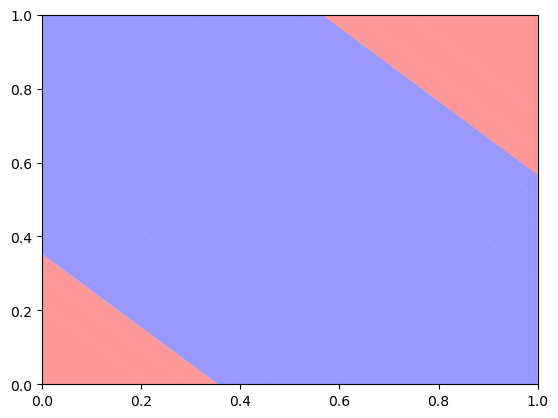

In [6]:
xx, yy = np.meshgrid(
    np.linspace(0, 1, 1000),
    np.linspace(0, 1, 1000)
)

D = np.vstack((xx.flatten(), yy.flatten())).T

_, y_pred = feedforward(D, **params)

plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
plt.show()

### Visualising XOR nonlinear separation

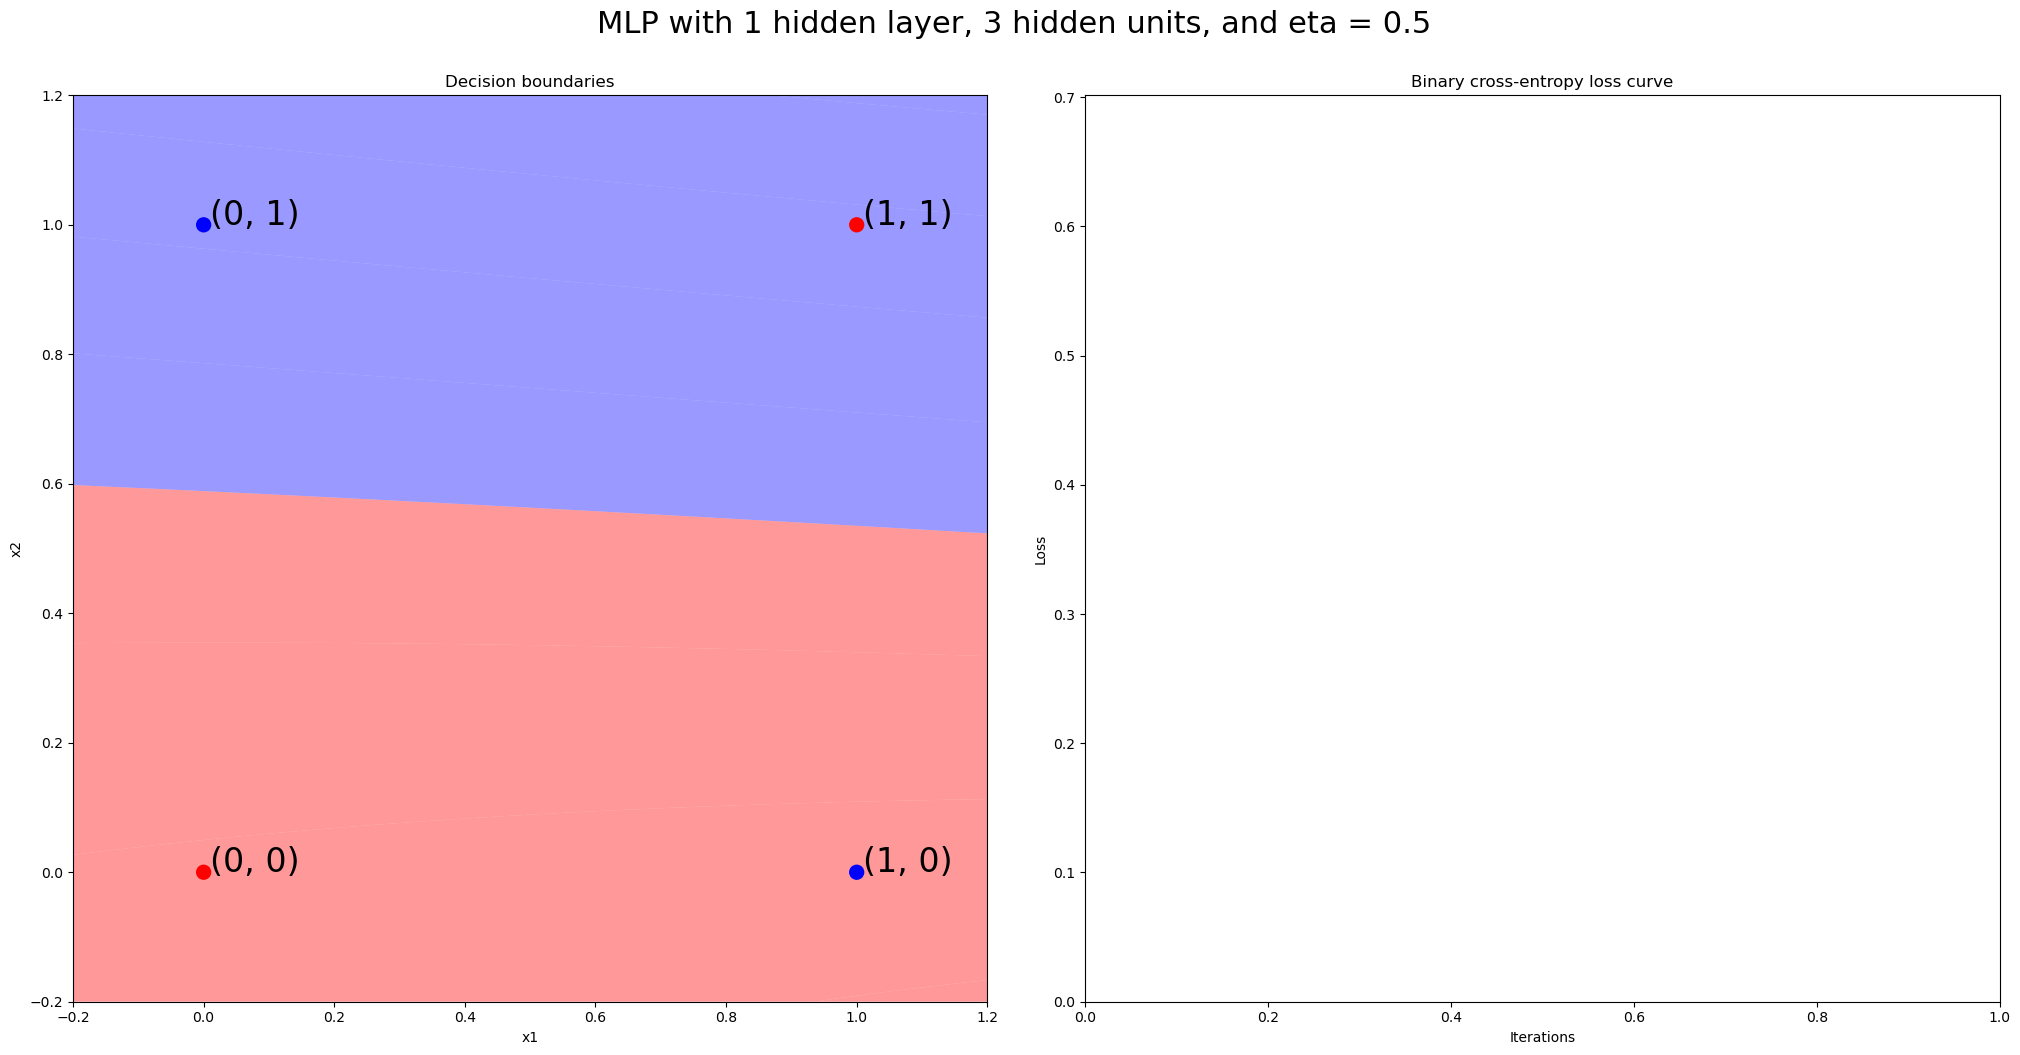

In [437]:
from matplotlib import animation

def train(X, y, params, eta):
    Z, y_pred = feedforward(X, **params)

    W1_d = eta * ((y - y_pred) * params['W2'].T * (Z * (1-Z))) @ X
    b1_d = eta * np.sum(((y - y_pred) * params['W2'].T * (Z * (1-Z))), axis=1)
    W2_d = eta * np.sum((y - y_pred) * Z, axis=1)
    b2_d = eta * np.sum(y - y_pred)

    params['W1'] += W1_d
    params['b1'] += b1_d[..., None]
    params['W2'] += W2_d[..., None].T
    params['b2'] += b2_d

d = 2
h = 3
o = 1

params = {
    'W1': np.random.normal(0, 1, size=(h, d)),
    'b1': np.random.normal(0, 1, size=(h, 1)),
    'W2': np.random.normal(0, 1, size=(o, h)),
    'b2': np.random.normal(0, 1, size=(o, 1)),
}

eta = 0.5

xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 100),
    np.linspace(-0.2, 1.2, 100)
)
D = np.vstack((xx.flatten(), yy.flatten())).T
_, y_pred = feedforward(D, **params)

FPS = 180

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
cont = ax1.contourf(xx, yy, y_pred.reshape(xx.shape))
ax1.set_title(f"Exclusive or (XOR) problem")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

line, = ax2.plot([], [])
ax2.set_title(f"Binary cross-entropy loss curve")
ax2.set_xlabel(f"Iterations")
ax2.set_ylabel(f"Loss")
loss = []

plt.tight_layout()

# animation function
def animate(_):
    global cont

    train(X, y, params, eta)
    _, y_pred = feedforward(X, **params)
    loss.append(cross_entropy(y, y_pred).sum() / y.shape[0])
    
    _, y_pred = feedforward(D, **params)
    ax1.clear()
    cont = ax1.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
    ax1.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=cmap1)
    for x1, x2 in X:
        ax1.annotate(f"({x1}, {x2})", (x1+.01, x2), fontsize=24)
    ax1.set_title(f"Decision boundaries")
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")

    line.set_data(list(range(len(loss))), loss)
    ax2.set_ylim((0, max(loss)))
    ax2.set_xlim((0, len(loss)))
    return cont, line,

fig.suptitle(f'MLP with 1 hidden layer, {h} hidden units, and eta = {eta}', fontsize=22, y=1.05)

anim = animation.FuncAnimation(fig, animate, frames=FPS, repeat=False, interval=1)
# anim.save('../demo_figures/xor_training_animation.mp4', writer=animation.FFMpegWriter(fps=30))

## Synthetic example

<AxesSubplot: >

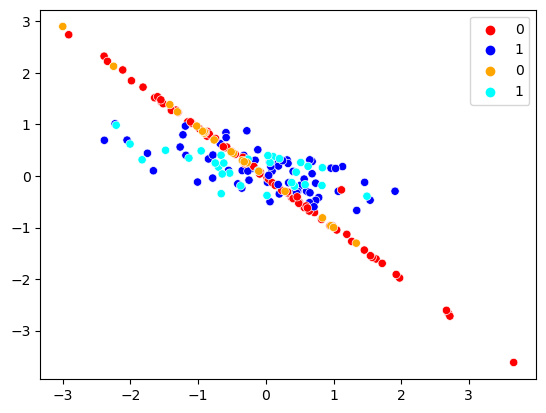

In [24]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=0.1
)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_test = X[:50, :]
y_test = y[:50]
X = X[50:, :]
y = y[50:]

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 1000),
    np.linspace(ymin-.5, ymax+.5, 1000)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

Loss of test set: 0.12429182045856382


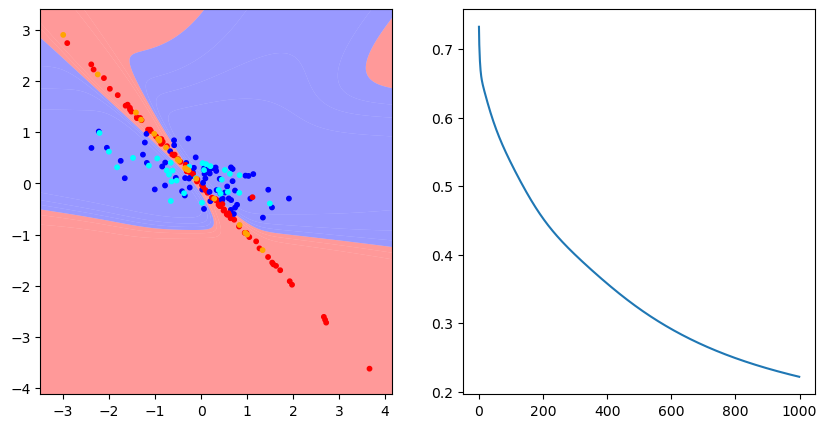

In [27]:
def train(X, y, params, eta):
    Z, y_pred = feedforward(X, **params)

    W1_d = eta * ((y - y_pred) * params['W2'].T * (Z * (1-Z))) @ X
    b1_d = eta * np.sum(((y - y_pred) * params['W2'].T * (Z * (1-Z))), axis=1)
    W2_d = eta * np.sum((y - y_pred) * Z, axis=1)
    b2_d = eta * np.sum(y - y_pred)

    params['W1'] += W1_d
    params['b1'] += b1_d[..., None]
    params['W2'] += W2_d[..., None].T
    params['b2'] += b2_d

d = 2 # input dim
h = 8 # num hidden neurons
o = 1 # output dim

params = {
    'W1': np.random.normal(0, 1, size=(h, d)),
    'b1': np.random.normal(0, 1, size=(h, 1)),
    'W2': np.random.normal(0, 1, size=(o, h)),
    'b2': np.random.normal(0, 1, size=(o, 1)),
}

eta = 0.01
loss = []

for _ in range(1000):
    train(X, y, params, eta)
    _, y_pred = feedforward(X, **params)
    loss.append(cross_entropy(y, y_pred).sum()/y.shape[0])

_, y_pred = feedforward(X_test, **params)
test_loss = cross_entropy(y_test, y_pred).sum() / y_test.shape[0]
print(f"Loss of test set: {test_loss}")

_, y_pred = feedforward(D, **params)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap1, s=10)
ax1.scatter(X_test[:, 0], y=X_test[:, 1], c=y_test, cmap=cmap2, s=10)
ax2.plot(range(len(loss)), loss)

## Visualising training process of Synthetic dataset 

In [464]:
from matplotlib import animation

def train(X, y, params, eta):
    Z, y_pred = feedforward(X, **params)

    W1_d = eta * ((y - y_pred) * params['W2'].T * (Z * (1-Z))) @ X
    b1_d = eta * np.sum(((y - y_pred) * params['W2'].T * (Z * (1-Z))), axis=1)
    W2_d = eta * np.sum((y - y_pred) * Z, axis=1)
    b2_d = eta * np.sum(y - y_pred)

    params['W1'] += W1_d
    params['b1'] += b1_d[..., None]
    params['W2'] += W2_d[..., None].T
    params['b2'] += b2_d


def animate_training_process(X, y, X_test, y_test, D, file_path, h=4, eta=0.01, epochs=150):

    params = {
        'W1': np.random.normal(0, 1, size=(h, 2)),
        'b1': np.random.normal(0, 1, size=(h, 1)),
        'W2': np.random.normal(0, 1, size=(1, h)),
        'b2': np.random.normal(0, 1, size=(1, 1)),
    }

    _, y_pred = feedforward(D, **params)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f"MLP: 1 hidden layer, {h} hidden units, {eta} learning rate", fontsize=20, y=1)
    cont = ax1.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4)
    ax1.set_title(f"Decision boundaries")
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")

    train_line, = ax2.plot([], [])
    val_line, = ax2.plot([], [])
    ax2.set_title(f"Binary cross-entropy loss curve")
    ax2.set_xlabel(f"Iterations")
    ax2.set_ylabel(f"Loss")

    plt.tight_layout()

    train_loss = []
    val_loss = []
    
    cont.set_array([])

    # animation function
    def animate(_):
        global cont

        train(X, y, params, eta)
        _, y_pred = feedforward(X, **params)
        train_loss.append(cross_entropy(y, y_pred).sum() / y.shape[0])

        _, y_pred = feedforward(X_test, **params)
        val_loss.append(cross_entropy(y_test, y_pred).sum() / y_test.shape[0])
        
        _, y_pred = feedforward(D, **params)
        ax1.clear()
        cont = ax1.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
        ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap1)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap2)
        ax1.set_title(f"Decision boundaries")
        ax1.set_xlabel("x1")
        ax1.set_ylabel("x2")

        train_line.set_data(list(range(len(train_loss))), train_loss)
        val_line.set_data(list(range(len(val_loss))), val_loss)
        ax2.set_ylim((0, max(max(train_loss), max(val_loss))))
        ax2.set_xlim((0, len(train_loss)))
        
        return cont, train_line, val_line,

    anim = animation.FuncAnimation(fig, animate, frames=epochs, repeat=False, interval=1)
    anim.save(file_path, writer=animation.FFMpegWriter(fps=20))

### Example 1

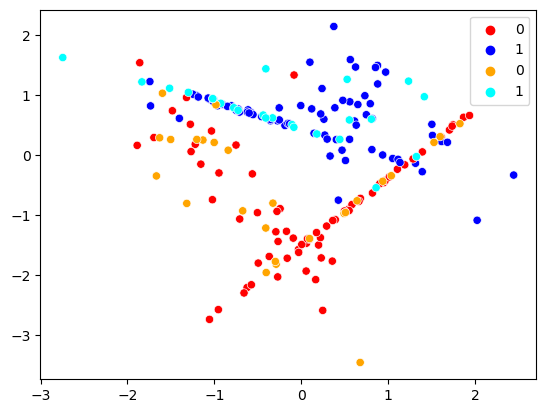

In [448]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=1
)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_test = X[:50, :]
y_test = y[:50]
X = X[50:, :]
y = y[50:]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

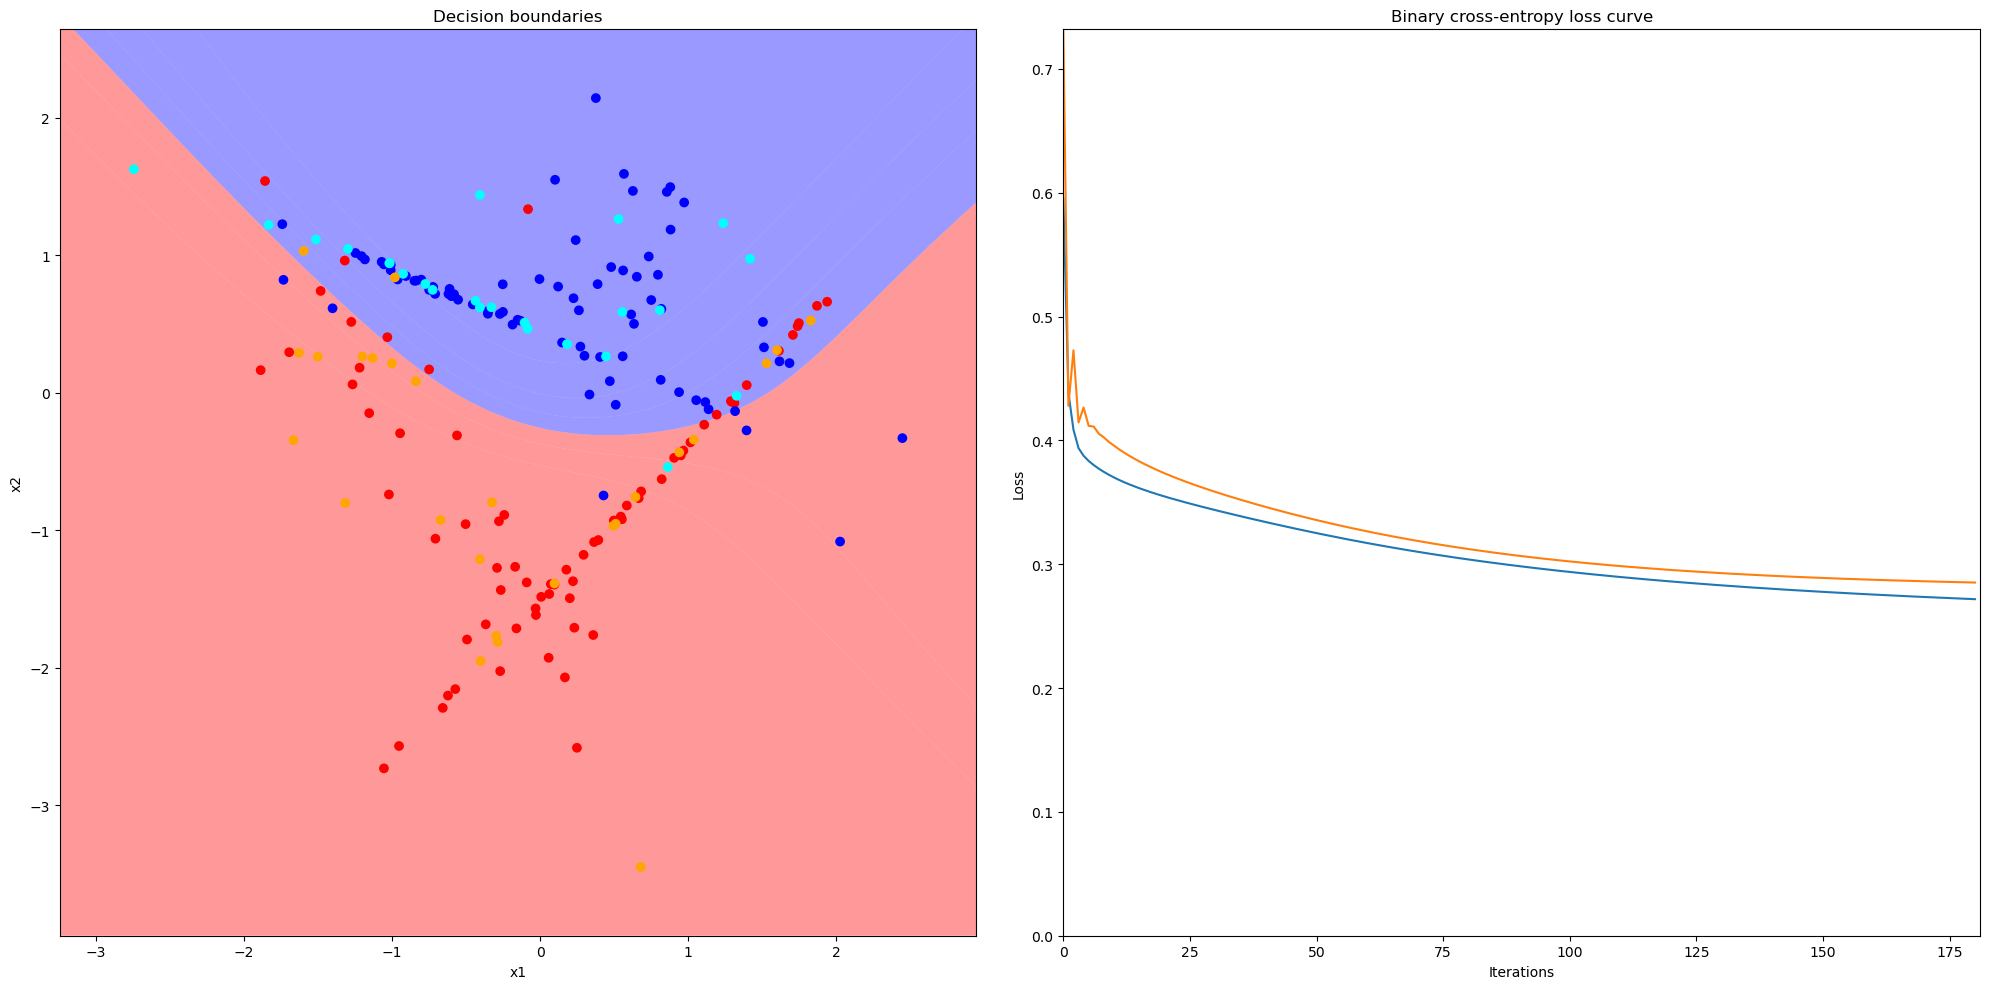

In [449]:
# animate_training_process(X, y, X_test, y_test, D, '../demo_figures/mlp_synthetic_animation1.mp4', epochs=180, eta=0.01, h=16)

### Example 2

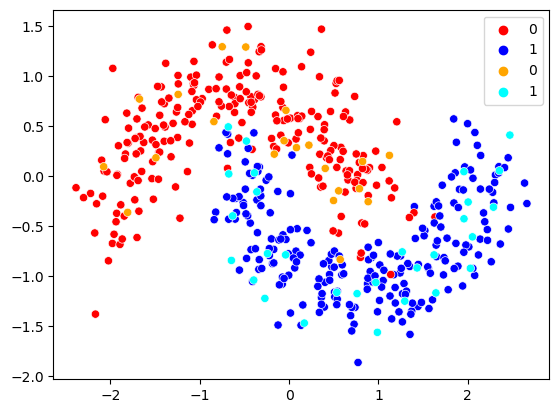

In [460]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.2)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_test = X[:50, :]
y_test = y[:50]
X = X[50:, :]
y = y[50:]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 200),
    np.linspace(ymin-.5, ymax+.5, 200)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

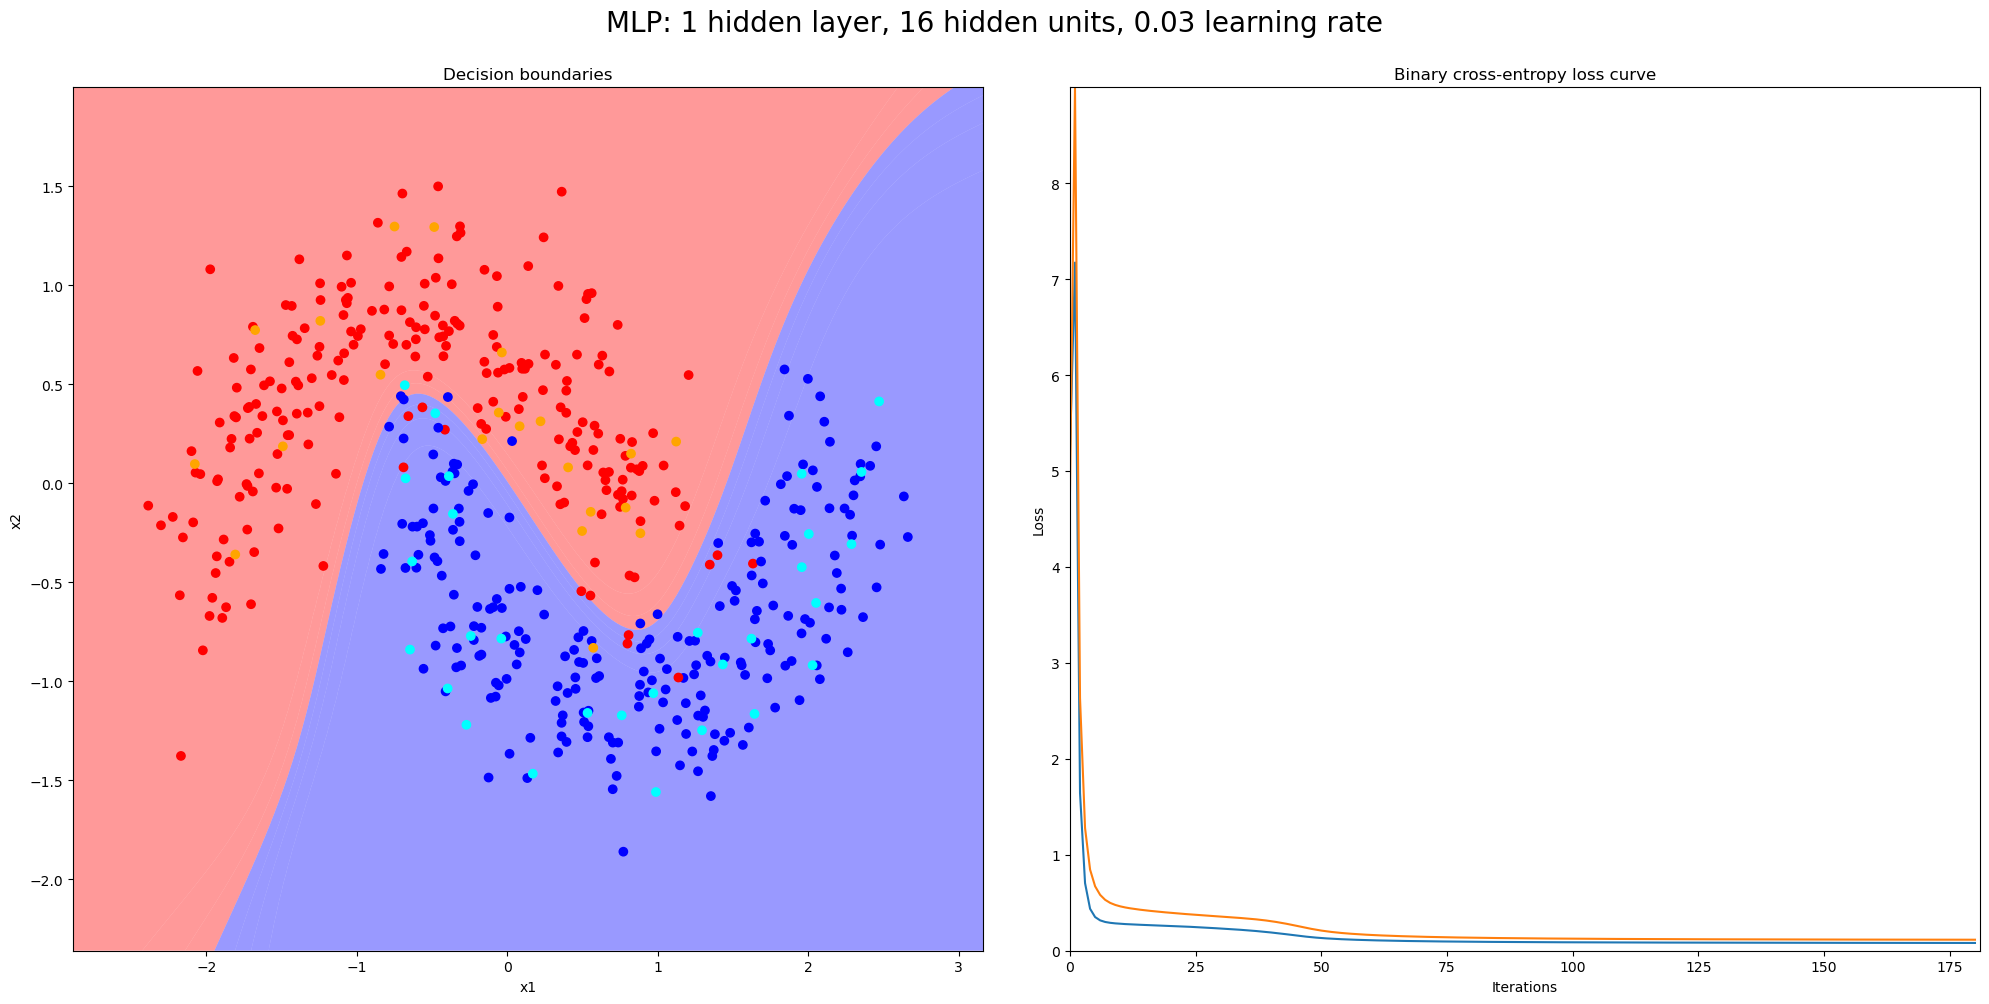

In [465]:
animate_training_process(X, y, X_test, y_test, D, '../demo_figures/mlp_synthetic_animation2.mp4', epochs=180, eta=0.03, h=16)

### Example 3

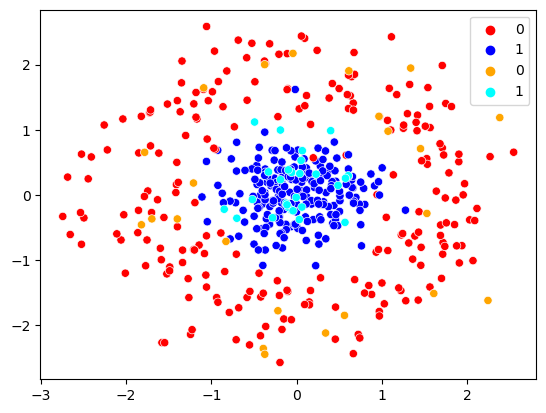

In [470]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.2, factor=.2)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_test = X[:50, :]
y_test = y[:50]
X = X[50:, :]
y = y[50:]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 200),
    np.linspace(ymin-.5, ymax+.5, 200)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

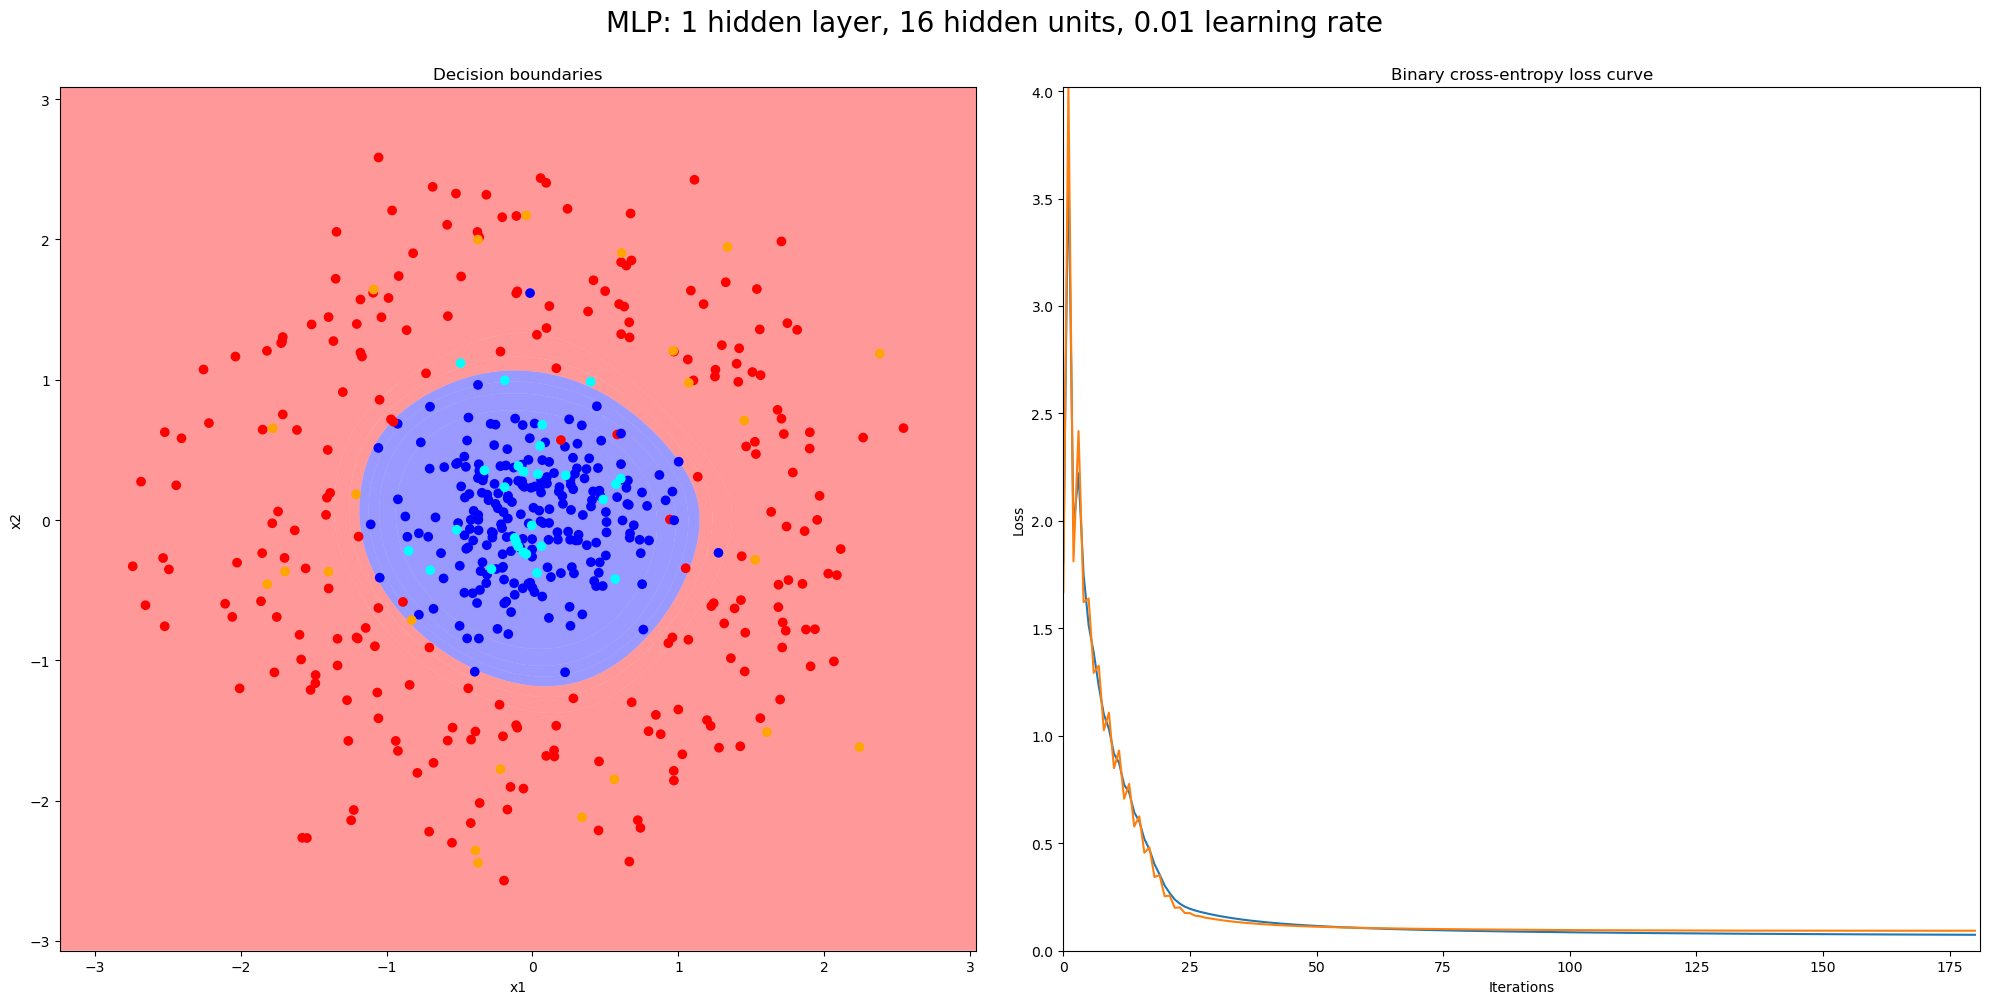

In [471]:
animate_training_process(X, y, X_test, y_test, D, '../demo_figures/mlp_synthetic_animation3.mp4', epochs=180, eta=0.01, h=16)

## Experiments

Encapsulating the MLP inside a class for convenience. 

In [352]:
from typing import Literal

class MLP:
    def __init__(self, h=4, eta=0.01, epochs=100, optimizer: Literal['sgd1', 'batch32', 'gd_all']='sgd1', batch_size=32) -> None:
        self.h = h
        self.eta = eta
        self.optimizer = optimizer
        self.epochs = epochs
        self.loss = None
        self.batch_size = batch_size
        self.params = {
            'W1': np.random.normal(0, 1, size=(h, 2)),
            'b1': np.random.normal(0, 1, size=(h, 1)),
            'W2': np.random.normal(0, 1, size=(1, h)),
            'b2': np.random.normal(0, 1, size=(1, 1)),
        }

    def sigmoid(X: np.ndarray):
        return 1/(1+np.exp(-X))

    def feedforward(self, X: np.ndarray):
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2']
        b2 = self.params['b2']
        Z = sigmoid(W1 @ X.T + b1)
        y = sigmoid(W2 @ Z + b2)
        return Z, y

    def cross_entropy(y: np.ndarray, y_pred: np.ndarray):
        return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)

    def fit(self, X: np.ndarray, y: np.ndarray):
        self.loss = []
        
        for _ in range(self.epochs):
            
            if self.optimizer == 'sgd1':
                i = np.random.randint(0, y.shape[0])
                idx = slice(i, i+1)
            elif self.optimizer == 'batch32':
                if y.shape[0] < self.batch_size:
                    idx = slice(0, y.shape[0])
                else:
                    idx = np.random.choice(range(y.shape[0]), size=self.batch_size, replace=False)
            else:
                idx = slice(0, y.shape[0])
            
            X_t = X[idx, :]
            y_t = y[idx]

            Z, y_pred = self.feedforward(X_t)
            self.loss.append(cross_entropy(y_t, y_pred).sum()/y_t.shape[0])

            W1_d = self.eta * ((y - y_pred) * self.params['W2'].T * (Z * (1-Z))) @ X
            b1_d = self.eta * np.sum((y_t - y_pred) * self.params['W2'].T * (Z * (1-Z)), axis=1)
            W2_d = self.eta * np.sum((y_t - y_pred) * Z, axis=1)
            b2_d = self.eta * np.sum(y_t - y_pred)

            self.params['W1'] += W1_d
            self.params['b1'] += b1_d[..., None]
            self.params['W2'] += W2_d[..., None].T
            self.params['b2'] += b2_d

        return self

### Example 1

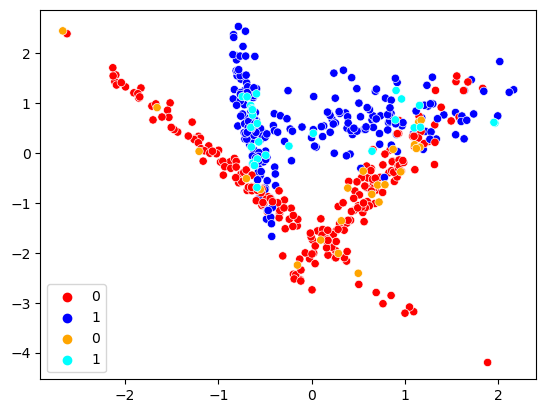

In [418]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=0.7
)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_test = X[:50, :]
y_test = y[:50]
X = X[50:, :]
y = y[50:]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

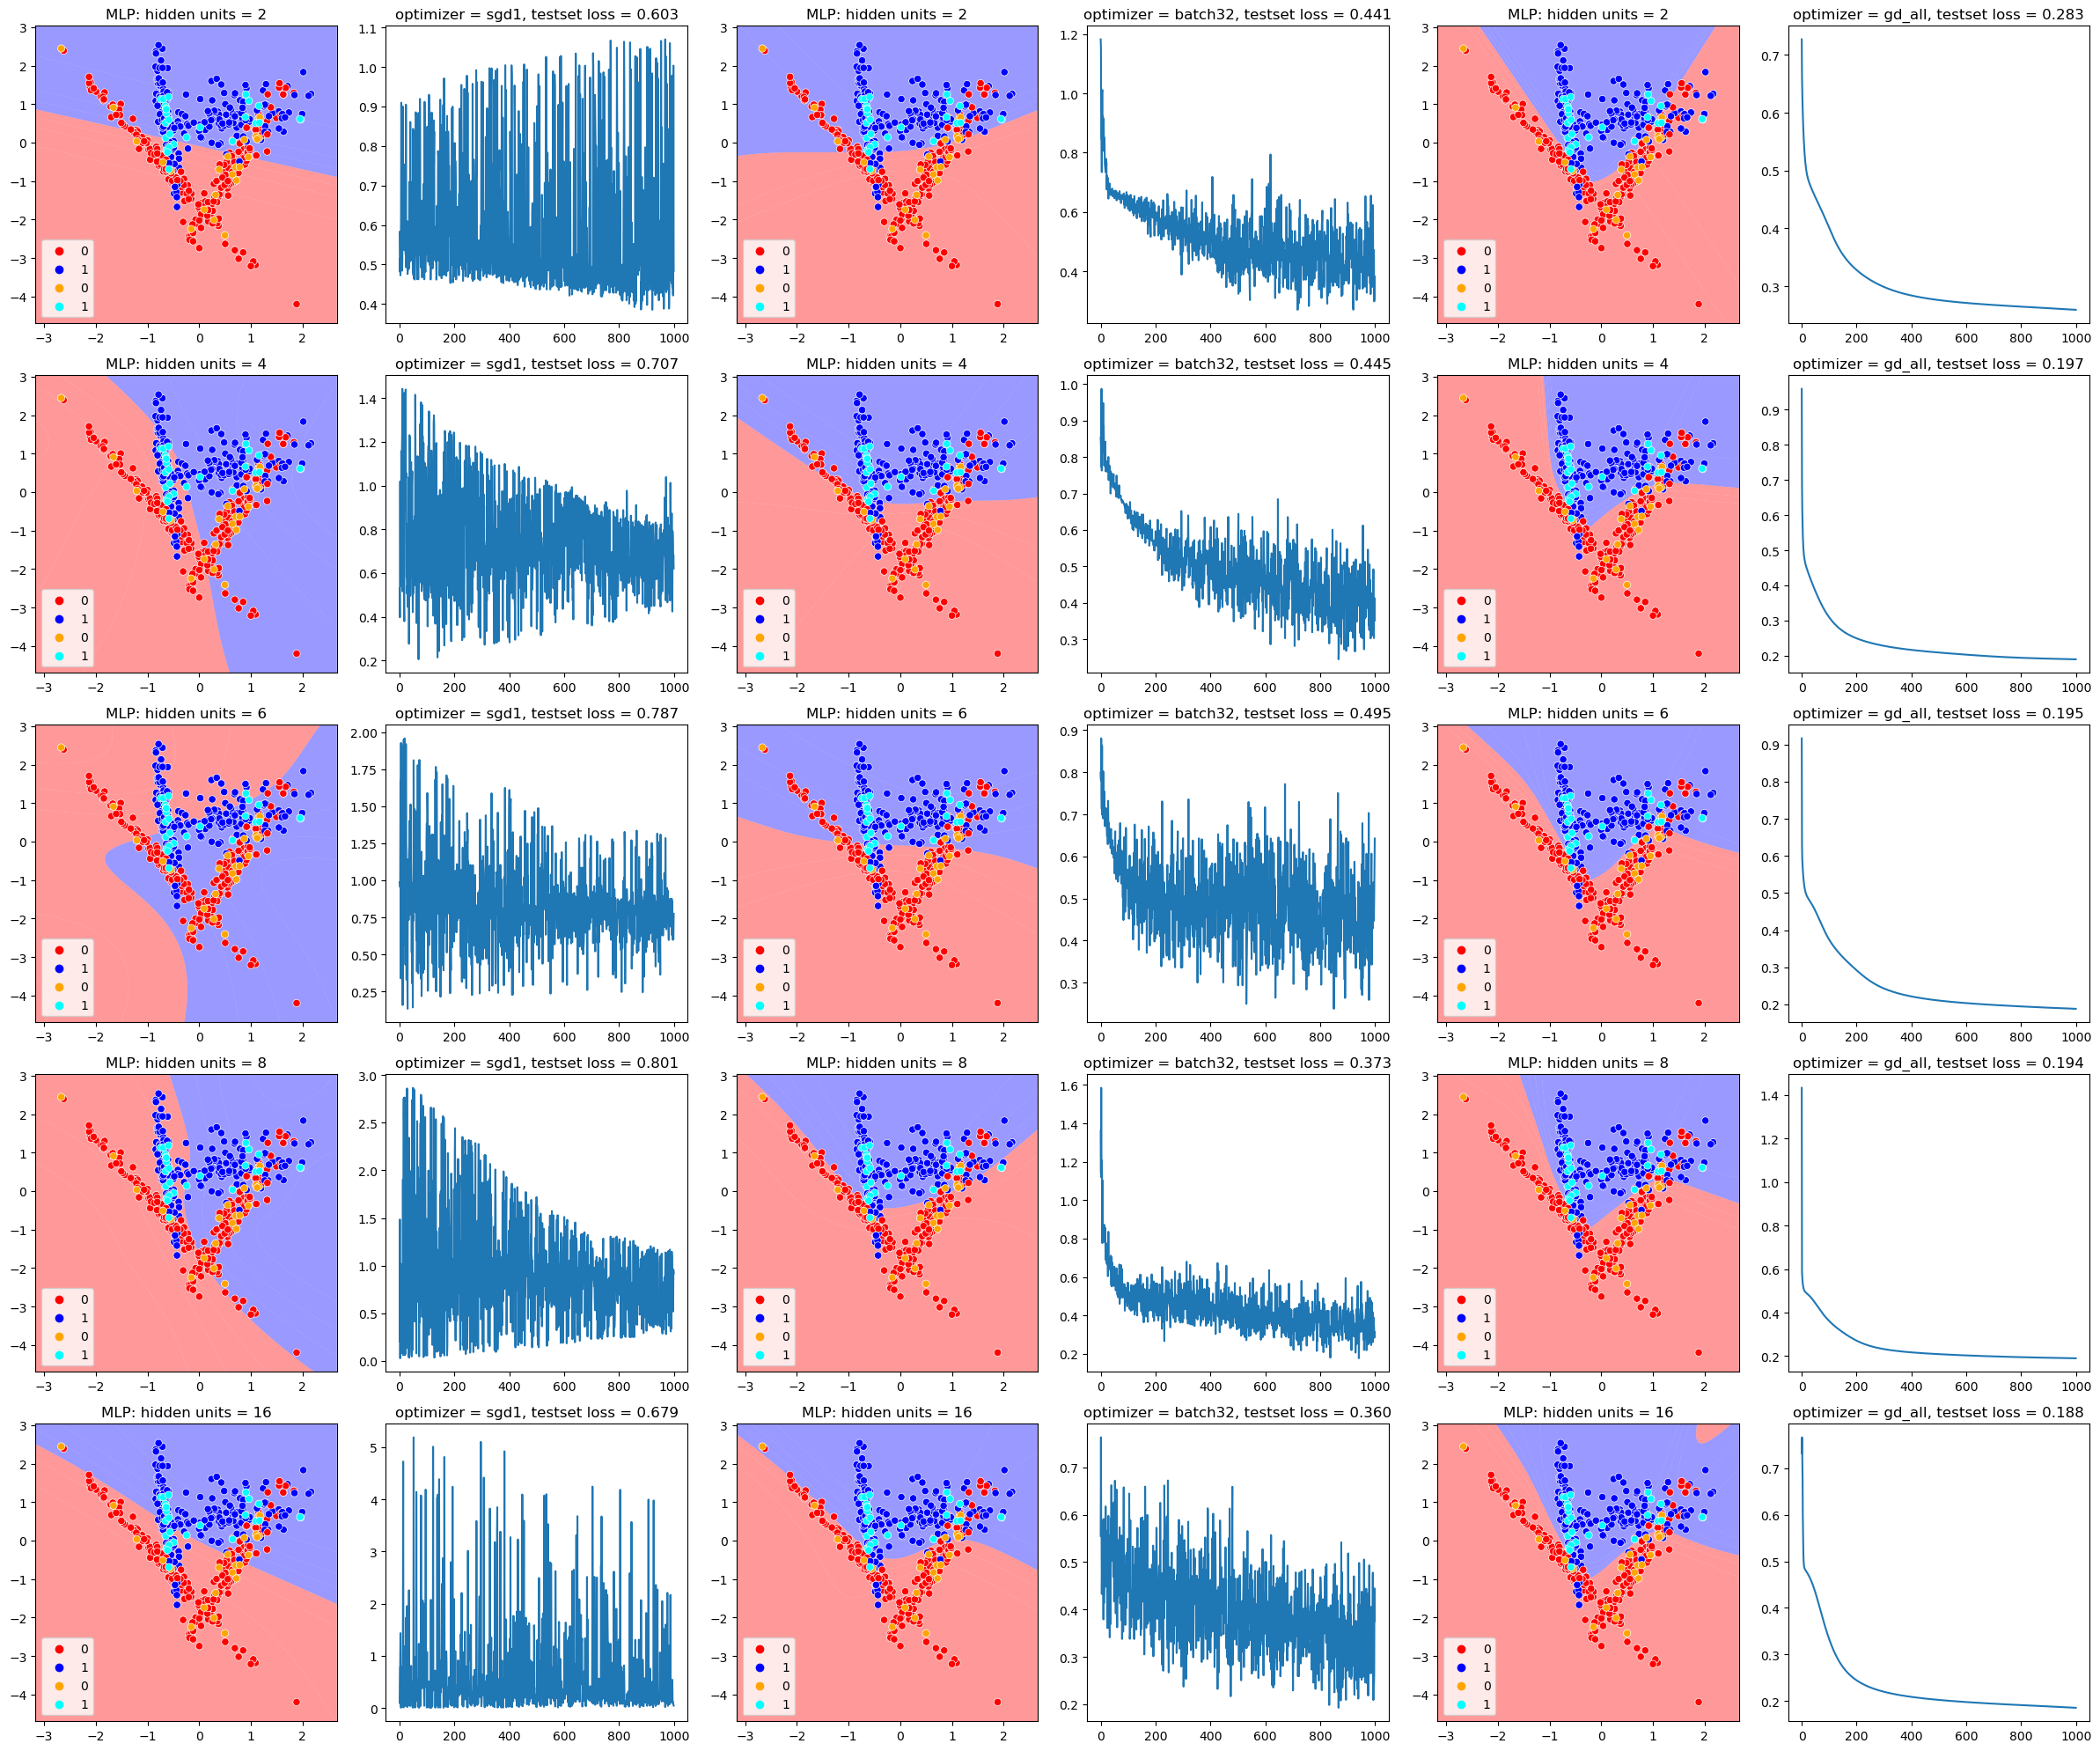

In [420]:
fig, axes = plt.subplots(5, 6, figsize=(24, 20))

hs = [2, 4, 6, 8, 16]
opts = ['sgd1', 'batch32', 'gd_all']

for i, opt in enumerate(opts):
    i = i*2
    for ax, h in zip(axes, hs):
        mlp = MLP(h=h, epochs=1000, eta=0.004, optimizer=opt).fit(X, y)
        _, y_pred = mlp.feedforward(D)
        ax[i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'], ax=ax[i])
        sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'], ax=ax[i])
        sns.lineplot(x=range(len(mlp.loss)), y=mlp.loss, ax=ax[i+1])
        ax[i].set_title(f"MLP: hidden units = {h}")
        _, y_pred = mlp.feedforward(X_test)
        loss = MLP.cross_entropy(y_test, y_pred).sum() / y_test.shape[0] 
        ax[i+1].set_title(f"optimizer = {opt}{mlp.batch_size if opt == 'batch' else ''}, testset loss = {loss:.3f}")

plt.tight_layout()

### Example 2

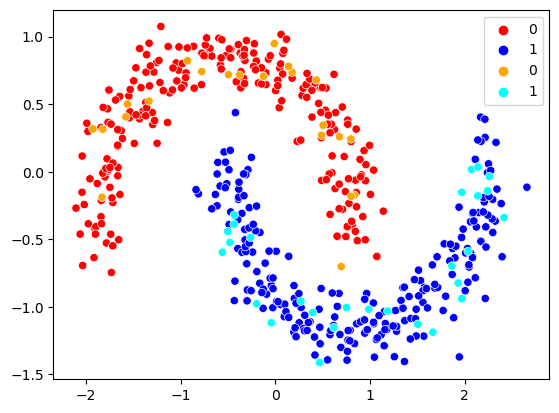

In [421]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_test = X[:50, :]
y_test = y[:50]
X = X[50:, :]
y = y[50:]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 200),
    np.linspace(ymin-.5, ymax+.5, 200)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

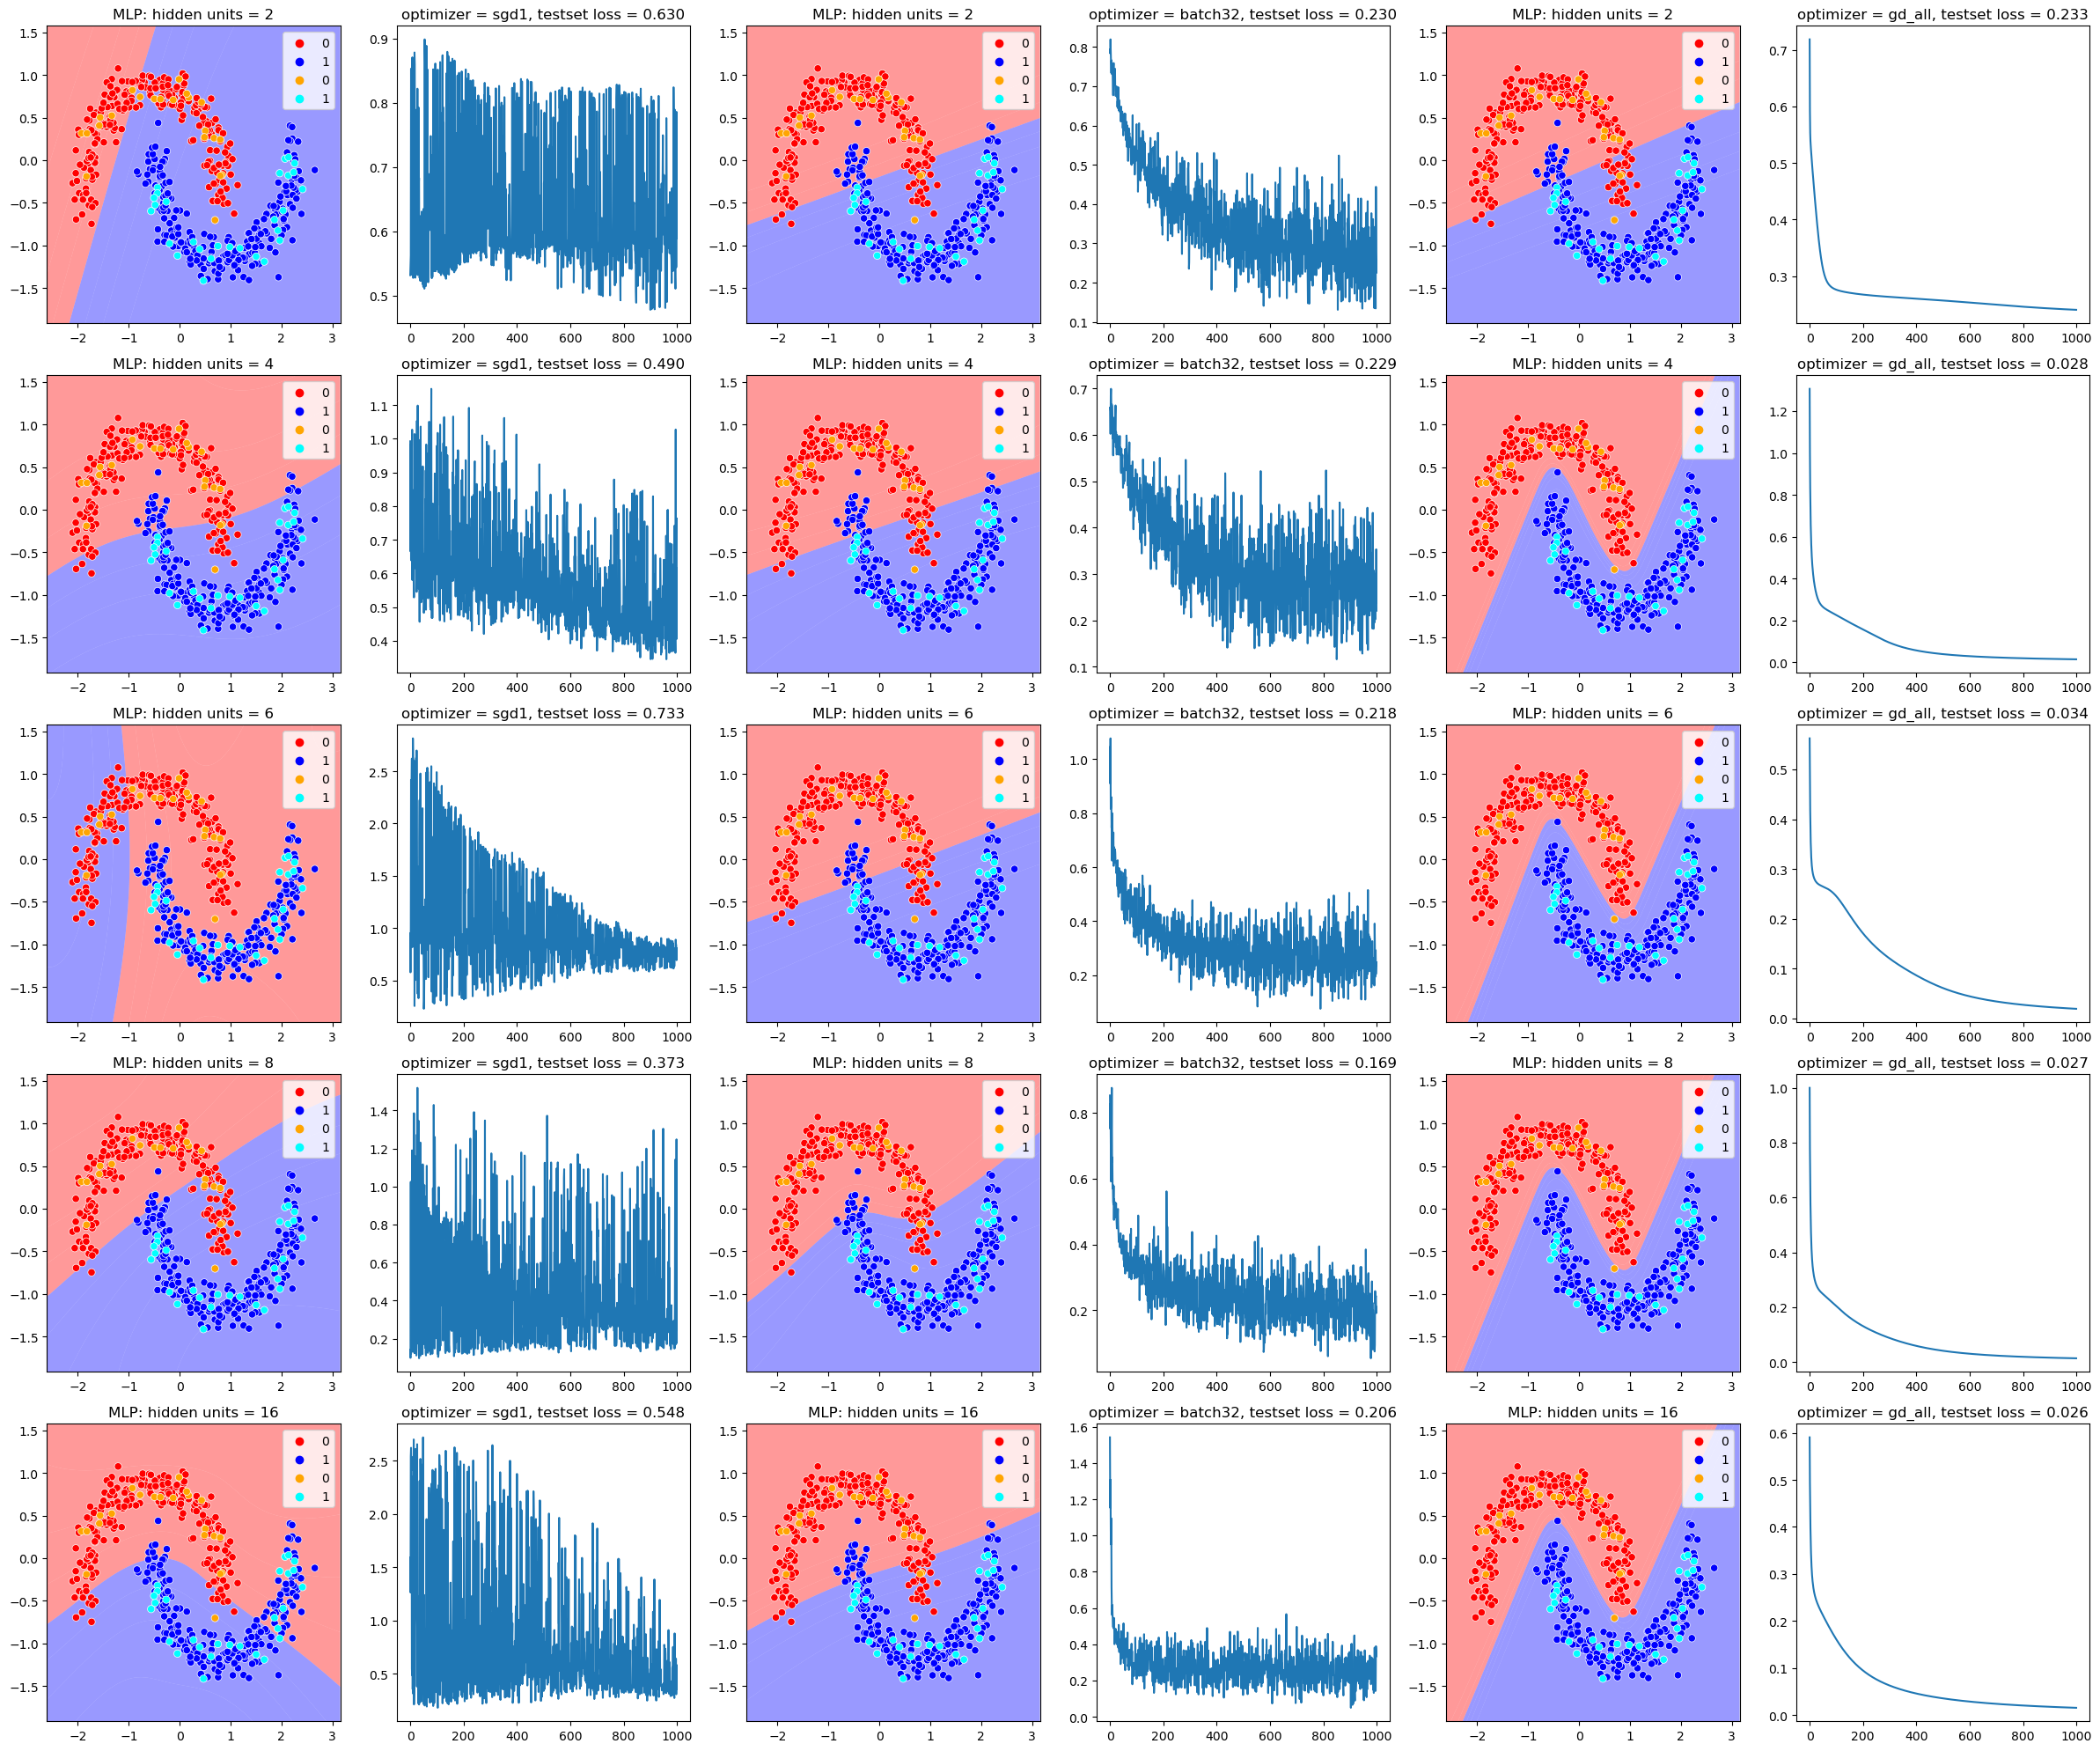

In [422]:
fig, axes = plt.subplots(5, 6, figsize=(24, 20))

hs = [2, 4, 6, 8, 16]
opts = ['sgd1', 'batch32', 'gd_all']

for i, opt in enumerate(opts):
    i = i*2
    for ax, h in zip(axes, hs):
        mlp = MLP(h=h, epochs=1000, eta=0.004, optimizer=opt).fit(X, y)
        _, y_pred = mlp.feedforward(D)
        ax[i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'], ax=ax[i])
        sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'], ax=ax[i])
        sns.lineplot(x=range(len(mlp.loss)), y=mlp.loss, ax=ax[i+1])
        ax[i].set_title(f"MLP: hidden units = {h}")
        _, y_pred = mlp.feedforward(X_test)
        loss = MLP.cross_entropy(y_test, y_pred).sum() / y_test.shape[0] 
        ax[i+1].set_title(f"optimizer = {opt}{mlp.batch_size if opt == 'batch' else ''}, testset loss = {loss:.3f}")

plt.tight_layout()

### Example 3 

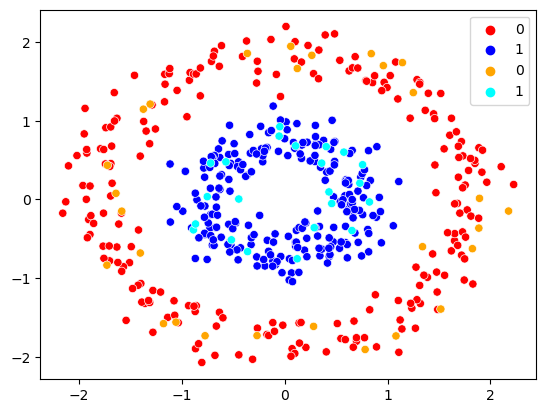

In [428]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.1, factor=.4)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_test = X[:50, :]
y_test = y[:50]
X = X[50:, :]
y = y[50:]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 200),
    np.linspace(ymin-.5, ymax+.5, 200)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

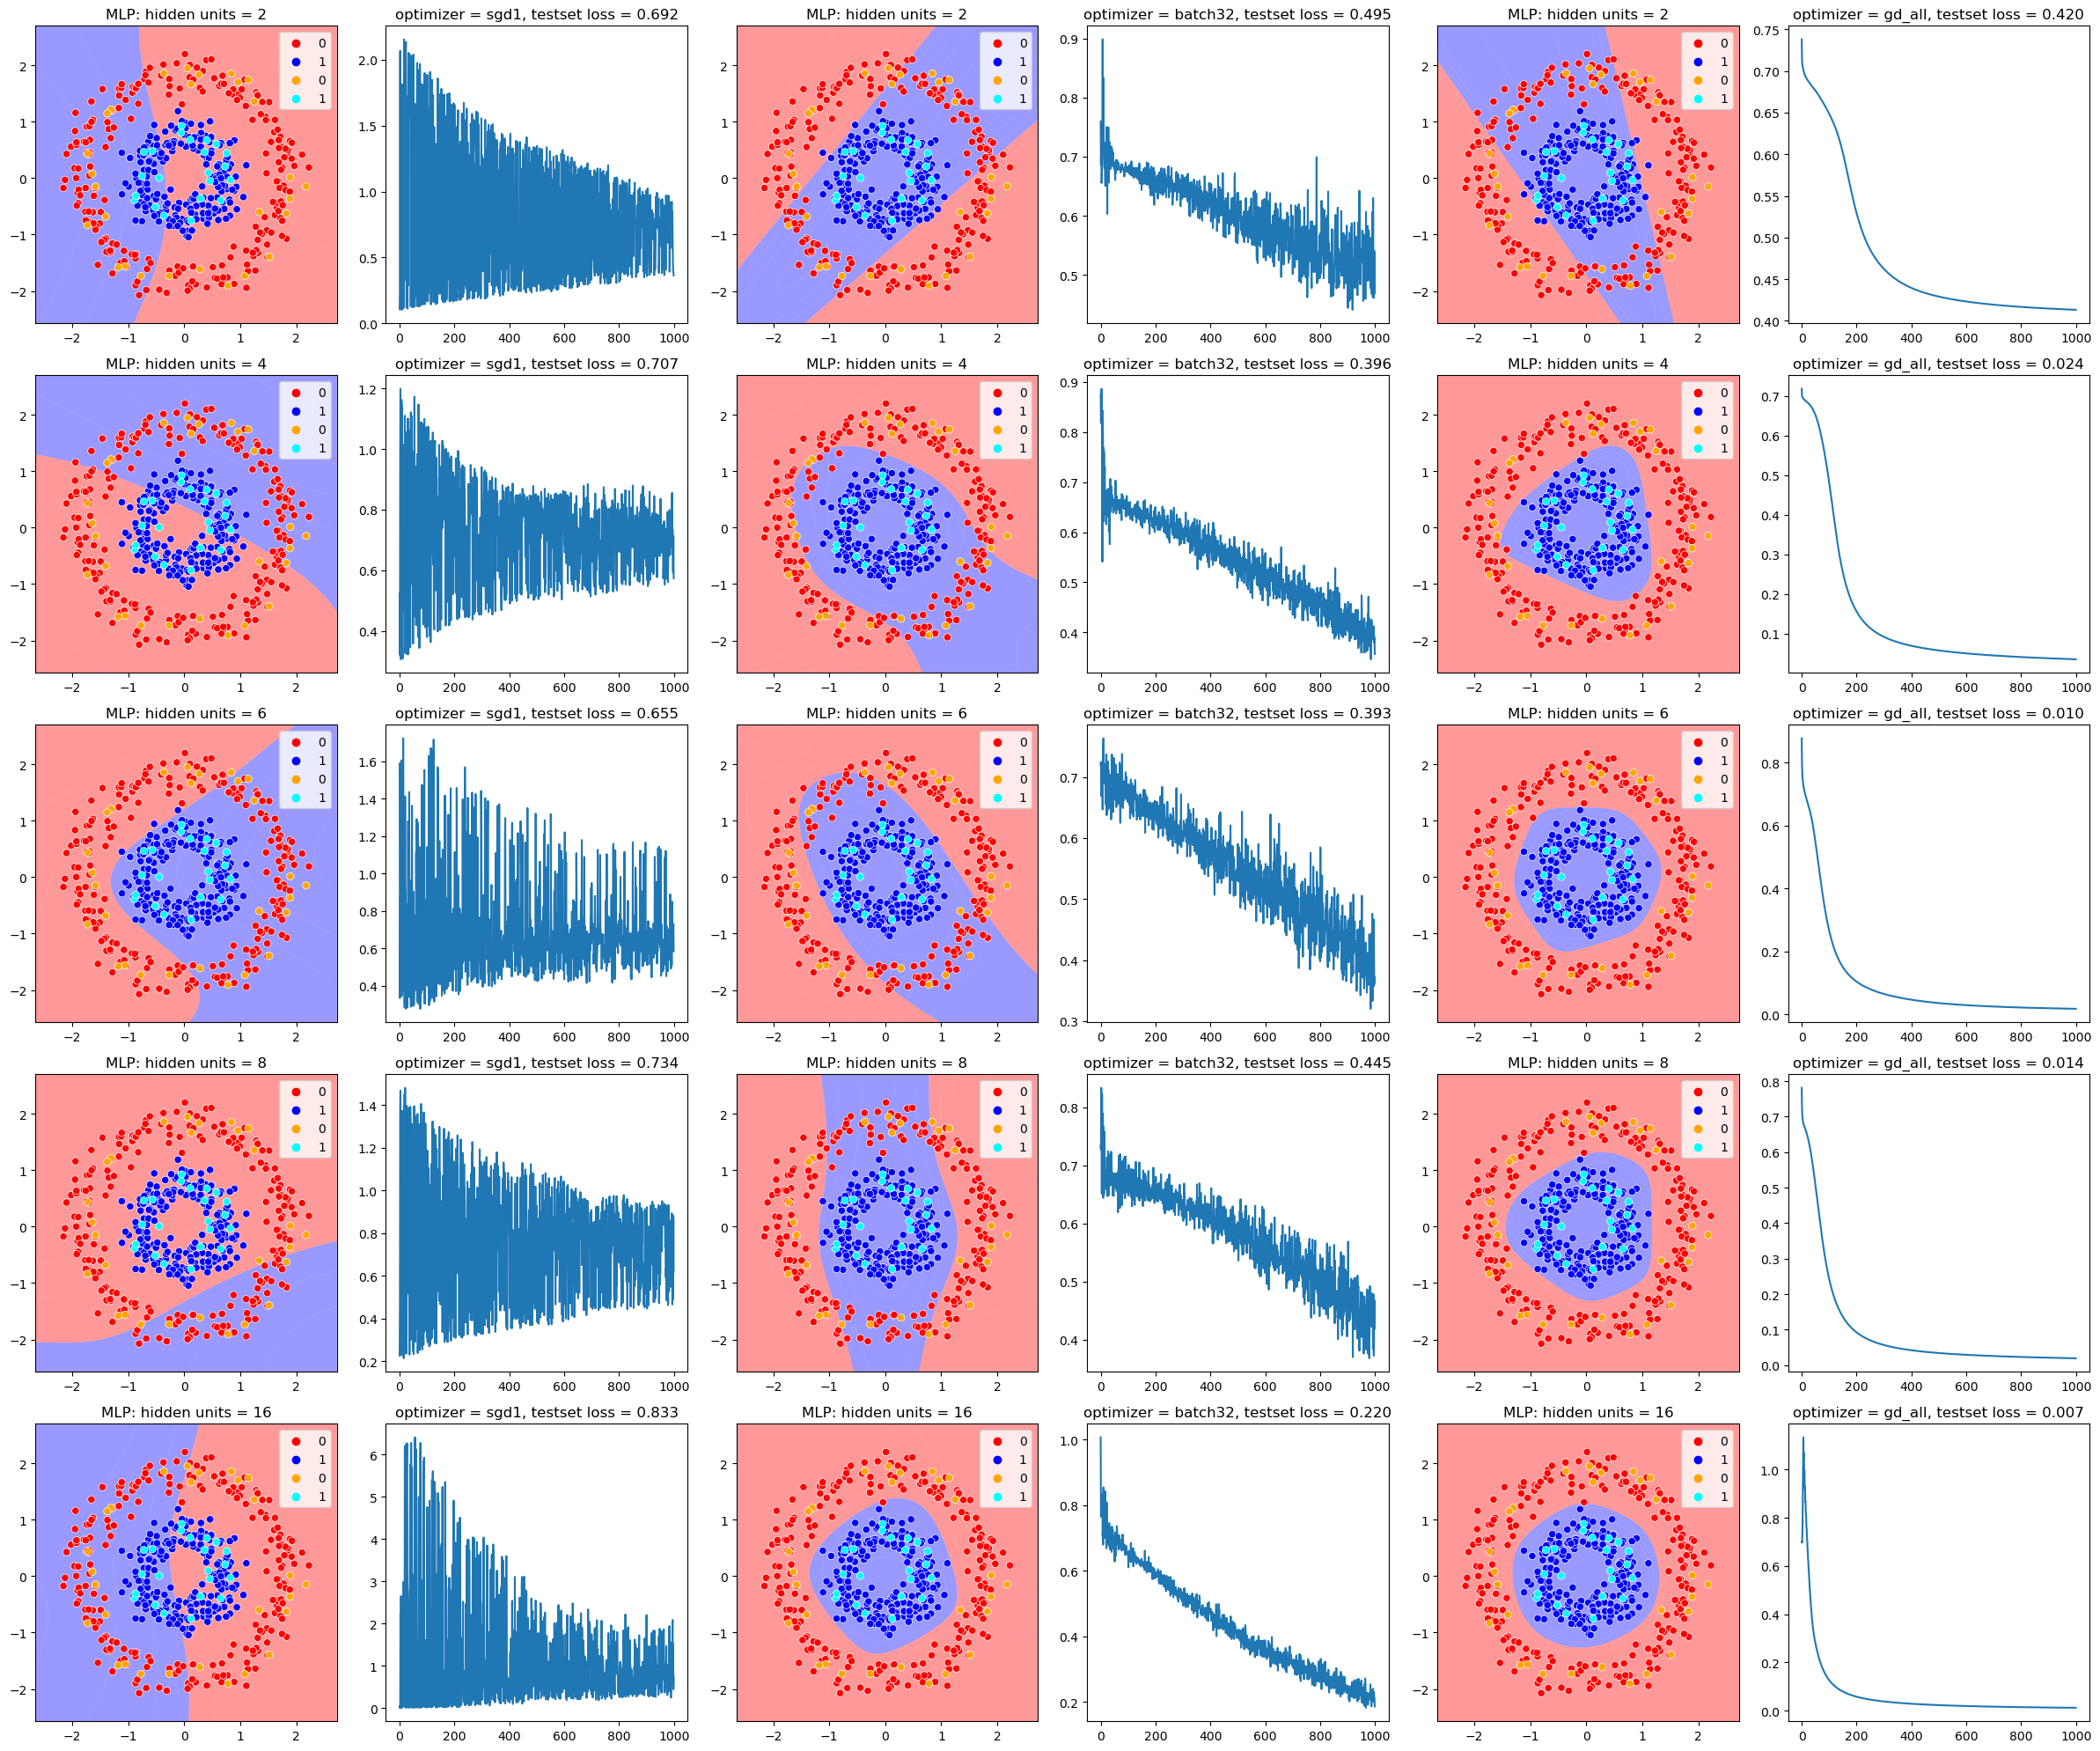

In [429]:
fig, axes = plt.subplots(5, 6, figsize=(24, 20))

hs = [2, 4, 6, 8, 16]
opts = ['sgd1', 'batch32', 'gd_all']

for i, opt in enumerate(opts):
    i = i*2
    for ax, h in zip(axes, hs):
        mlp = MLP(h=h, epochs=1000, eta=0.004, optimizer=opt).fit(X, y)
        _, y_pred = mlp.feedforward(D)
        ax[i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'], ax=ax[i])
        sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'], ax=ax[i])
        sns.lineplot(x=range(len(mlp.loss)), y=mlp.loss, ax=ax[i+1])
        ax[i].set_title(f"MLP: hidden units = {h}")
        _, y_pred = mlp.feedforward(X_test)
        loss = MLP.cross_entropy(y_test, y_pred).sum() / y_test.shape[0] 
        ax[i+1].set_title(f"optimizer = {opt}{mlp.batch_size if opt == 'batch' else ''}, testset loss = {loss:.3f}")

plt.tight_layout()

## Multiple outputs

In [575]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

y = np.array([
    [0, 1], 
    [1, 0], 
    [1, 0], 
    [0, 1]
])

d = 2 # number of input dims
N = 4 # number of input instances

h = 3 # number of neurons hidden layer 
o = 2 # number of neurons output layer 

params = {
    'W1': np.random.normal(0, 1, size=(h, d)),
    'b1': np.random.normal(0, 1, size=(h, 1)),
    'W2': np.random.normal(0, 1, size=(o, h)),
    'b2': np.random.normal(0, 1, size=(o, 1)),
}

loss = []

params

{'W1': array([[ 1.25805035,  1.01741315],
        [ 0.89451829,  1.10355416],
        [ 0.33692608, -2.54820445]]),
 'b1': array([[ 0.68620341],
        [-0.13403139],
        [ 0.60567131]]),
 'W2': array([[ 0.95813606,  1.05575776, -0.71905156],
        [-0.08371175,  3.43648435, -1.17449492]]),
 'b2': array([[-0.69857263],
        [ 0.13114629]])}

0.05482905451032083


<AxesSubplot: >

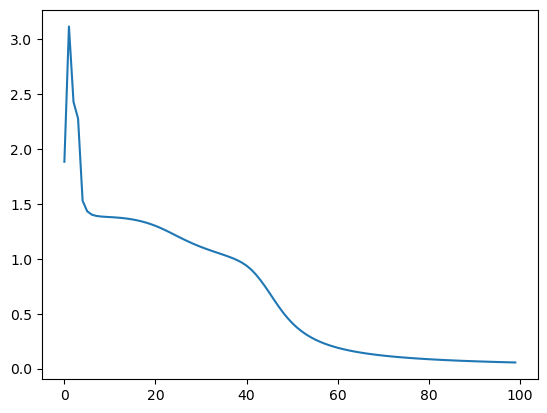

In [576]:
def sigmoid(X: np.ndarray):
    return 1/(1+np.exp(-X))

def feedforward(X, W1, b1, W2, b2):
    Z = sigmoid(W1 @ X.T + b1)
    y = sigmoid(W2 @ Z + b2)
    return Z, y

def cross_entropy(y, y_pred):
    return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)

eta = 1.5

for _ in range(100):

    Z, y_pred = feedforward(X, **params)
    loss.append(cross_entropy(y.T, y_pred).sum() / N)

    W1_d = eta * np.sum(((y.T - y_pred)[..., None, :] * params['W2'][..., None] * (Z * (1-Z))) @ X, axis=0)
    b1_d = eta * ((y.T - y_pred)[..., None, :] * params['W2'][..., None] * (Z * (1-Z))).sum(axis=0).sum(axis=1)
    W2_d = eta * ((y.T - y_pred)[..., None, :] * Z).sum(axis=2)
    b2_d = eta * (y.T - y_pred).sum(axis=1)

    params['W1'] += W1_d
    params['b1'] += b1_d[..., None]
    params['W2'] += W2_d
    params['b2'] += b2_d[..., None]

Z, y_pred = feedforward(X, **params)
err = cross_entropy(y.T, y_pred).sum() / N
print(err)

sns.lineplot(x=range(len(loss)), y=loss)

Changes to be made. `(y.T - y_pred)` is now 2 x 4 instead of 1 x 4

In [577]:
(y.T - y_pred)

array([[-0.01157173,  0.0218588 ,  0.02603932, -0.04700504],
       [ 0.0091432 , -0.02210275, -0.02677459,  0.05102257]])

Need to add new dimension for broadcasting and then transposing the newly added dimension. Now we have two 1 x 4 vector which we can broadcast 

In [580]:
(y.T - y_pred)[..., None, :]

array([[[-0.01157173,  0.0218588 ,  0.02603932, -0.04700504]],

       [[ 0.0091432 , -0.02210275, -0.02677459,  0.05102257]]])

Likewise for `W2` which was previously `W2.T` and thus 1 x 3, but now it is 2 x 3

In [292]:
params['W2']

array([[ 7.08858996, -8.63057804,  2.97179816],
       [-7.10082049,  8.55462355, -2.59008167]])

Adding a new dimension leads to two 1 x 3 vectors

In [582]:
params['W2'][..., None]

array([[ 7.39657319],
       [-3.2940384 ],
       [ 7.56155811]])

We can now successfully multiply `W2` with `(y.T - y_pred)` (implicit broadcast) to obtain two 3 x 4 matrices

In [586]:
(y.T - y_pred)[..., None, :] * params['W2'][..., None]

array([[[-0.08559112,  0.16168025,  0.19260176, -0.34767625],
        [ 0.03811771, -0.07200374, -0.08577453,  0.15483642],
        [-0.08750028,  0.16528662,  0.19689785, -0.35543138]],

       [[-0.06661105,  0.16102536,  0.19506116, -0.37171516],
        [ 0.03444063, -0.08325669, -0.1008546 ,  0.19219194],
        [-0.06845803,  0.16549026,  0.20046981, -0.38202206]]])

The rest follows from here due to broadcast semantics. Important note that we need to sum for `delta W1`, and the axis over which we sum is now different for all parameters.

## Multivariate MLP class

In [823]:
from typing import Literal

class MLPMultivariate:
    def __init__(self, h=4, o=2, eta=0.01, epochs=100, optimizer: Literal['sgd1', 'batch32', 'gd_all']='sgd1', batch_size=32) -> None:
        self.h = h
        self.o = o
        self.eta = eta
        self.optimizer = optimizer
        self.epochs = epochs
        self.train_loss = None
        self.val_loss = None
        self.batch_size = batch_size
        self.params = None

    def sigmoid(X: np.ndarray):
        return 1/(1+np.exp(-X))

    def feedforward(self, X: np.ndarray):
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2']
        b2 = self.params['b2']
        Z = sigmoid(W1 @ X.T + b1)
        y = sigmoid(W2 @ Z + b2)

        # if np.any(y == 0):
        #     print(W2, b2)

        return Z, y

    def cross_entropy(y: np.ndarray, y_pred: np.ndarray):
        return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)

    def fit(self, X: np.ndarray, y: np.ndarray, val_X: np.ndarray = None, val_y: np.ndarray = None):
        
        self.train_loss = []
        if val_X is not None and val_y is not None: self.val_loss = []
        
        self.params = {
            'W1': np.random.normal(0, .01, size=(self.h, X.shape[1])),
            'b1': np.random.normal(0, .01, size=(self.h, 1)),
            'W2': np.random.normal(0, .01, size=(self.o, self.h)),
            'b2': np.random.normal(0, .01, size=(self.o, 1)),
        }

        y = y.T
        
        for _ in range(self.epochs):
            
            if self.optimizer == 'sgd1':
                i = np.random.randint(0, y.shape[1])
                idx = slice(i, i+1)
            elif self.optimizer == 'batch32':
                if y.shape[1] < self.batch_size:
                    idx = slice(0, y.shape[1])
                else:
                    idx = np.random.choice(range(y.shape[1]), size=self.batch_size, replace=False)
            else:
                idx = slice(0, y.shape[1])
            
            X_t = X[idx, :]
            y_t = y[:, idx] # due to transpose

            Z, y_pred = self.feedforward(X_t)
                
            self.train_loss.append(MLPMultivariate.cross_entropy(y_t, y_pred).sum()/y_t.shape[1])
            
            if val_X is not None and val_y is not None: 
                _, val_y_pred = self.feedforward(val_X)
                self.val_loss.append(MLPMultivariate.cross_entropy(val_y.T, val_y_pred).sum()/val_y.shape[0])  

            W1_d = eta * np.sum(((y_t - y_pred)[..., None, :] * self.params['W2'][..., None] * (Z * (1-Z))) @ X_t, axis=0)
            b1_d = eta * ((y_t - y_pred)[..., None, :] * self.params['W2'][..., None] * (Z * (1-Z))).sum(axis=0).sum(axis=1)
            W2_d = eta * ((y_t - y_pred)[..., None, :] * Z).sum(axis=2)
            b2_d = eta * (y_t - y_pred).sum(axis=1)

            self.params['W1'] += W1_d
            self.params['b1'] += b1_d[..., None]
            self.params['W2'] += W2_d
            self.params['b2'] += b2_d[..., None]

        return self

### Example XOR

For 3 learning optimizers
- stochastic gradient descent (online learning)
- minibatch learning with `batch_size = 2`
- gradient descent (batch learning)
trained on XOR dataset where output is one hot encoded (just to test multivariate MLP).

It seems that same results are found between 3 learners, but with different amount of epochs
- epochs = 3000, batch size = 1, **SGD**
- epochs = 1500, batch size = 2, **Minibatch**
- epochs = 750, batch size = 4, **GD**

<AxesSubplot: title={'center': 'gd, loss=0.01, h=32'}>

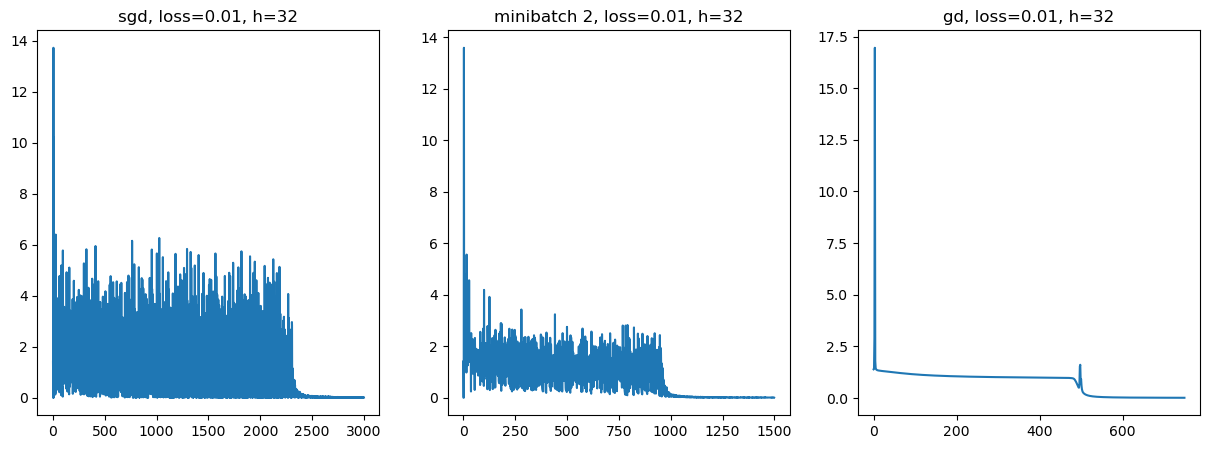

In [875]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

y = np.array([
    [0, 1], 
    [1, 0], 
    [1, 0], 
    [0, 1]
])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

mlp = MLPMultivariate(optimizer='sgd1', h=32, epochs=3000, eta=1e-6).fit(X, y)
axes[0].set_title(f"sgd, loss={mlp.train_loss[-1]:.2f}, h={32}")
sns.lineplot(x=range(len(mlp.train_loss)), y=mlp.train_loss, ax=axes[0])

mlp = MLPMultivariate(optimizer='batch32', batch_size=2, h=32, epochs=1500, eta=1e-6).fit(X, y)
axes[1].set_title(f"minibatch 2, loss={mlp.train_loss[-1]:.2f}, h={32}")
sns.lineplot(x=range(len(mlp.train_loss)), y=mlp.train_loss, ax=axes[1])

mlp = MLPMultivariate(optimizer='gd_all', h=32, epochs=750, eta=1e-6).fit(X, y)
axes[2].set_title(f"gd, loss={mlp.train_loss[-1]:.2f}, h={32}")
sns.lineplot(x=range(len(mlp.train_loss)), y=mlp.train_loss, ax=axes[2])

### Example moons 

((360, 2), (100, 2), (40, 2), (360,), (100,), (40,))

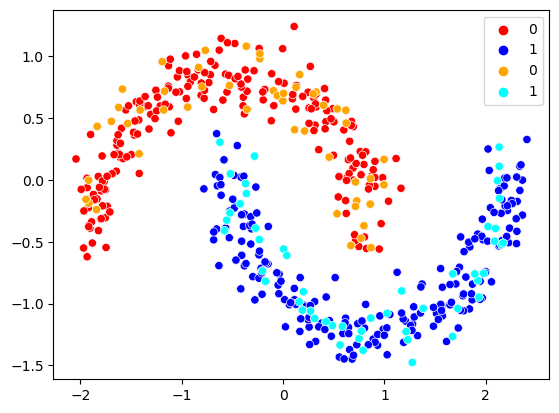

In [881]:
from sklearn.datasets import load_breast_cancer, make_circles, make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.1)

X = (X - X.mean()) / X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1, stratify=y_train)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 200),
    np.linspace(ymin-.5, ymax+.5, 200)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

C:\Users\janba\AppData\Local\Temp\ipykernel_33992\3348190520.py:32: RuntimeWarning: divide by zero encountered in log
  return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)


0.00015713727667470125

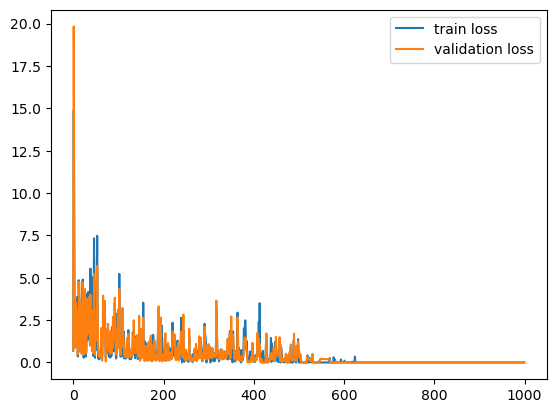

In [890]:
mlp = MLPMultivariate(optimizer='batch32', o=1, h=32, epochs=1000, eta=1e-7).fit(X_train, y_train[..., None], val_X=X_val, val_y=y_val[..., None])

sns.lineplot(x=range(len(mlp.train_loss)), y=mlp.train_loss, label='train loss')
sns.lineplot(x=range(len(mlp.val_loss)), y=mlp.val_loss, label='validation loss')

_, y_test_pred = mlp.feedforward(X_test)
MLPMultivariate.cross_entropy(y_test[..., None], y_test_pred.T).sum() / y_test_pred.shape[1]

C:\Users\janba\AppData\Local\Temp\ipykernel_33992\3348190520.py:32: RuntimeWarning: divide by zero encountered in log
  return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
C:\Users\janba\AppData\Local\Temp\ipykernel_33992\3348190520.py:32: RuntimeWarning: invalid value encountered in multiply
  return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
C:\Users\janba\AppData\Local\Temp\ipykernel_33992\3348190520.py:32: RuntimeWarning: divide by zero encountered in log
  return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
C:\Users\janba\AppData\Local\Temp\ipykernel_33992\3348190520.py:32: RuntimeWarning: invalid value encountered in multiply
  return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
C:\Users\janba\AppData\Local\Temp\ipykernel_33992\3348190520.py:32: RuntimeWarning: divide by zero encountered in log
  return -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
C:\Users\janba\AppData\Local\Temp\ipykernel_33992\3348190520.py:32: RuntimeWarning: invalid value encountered in multiply


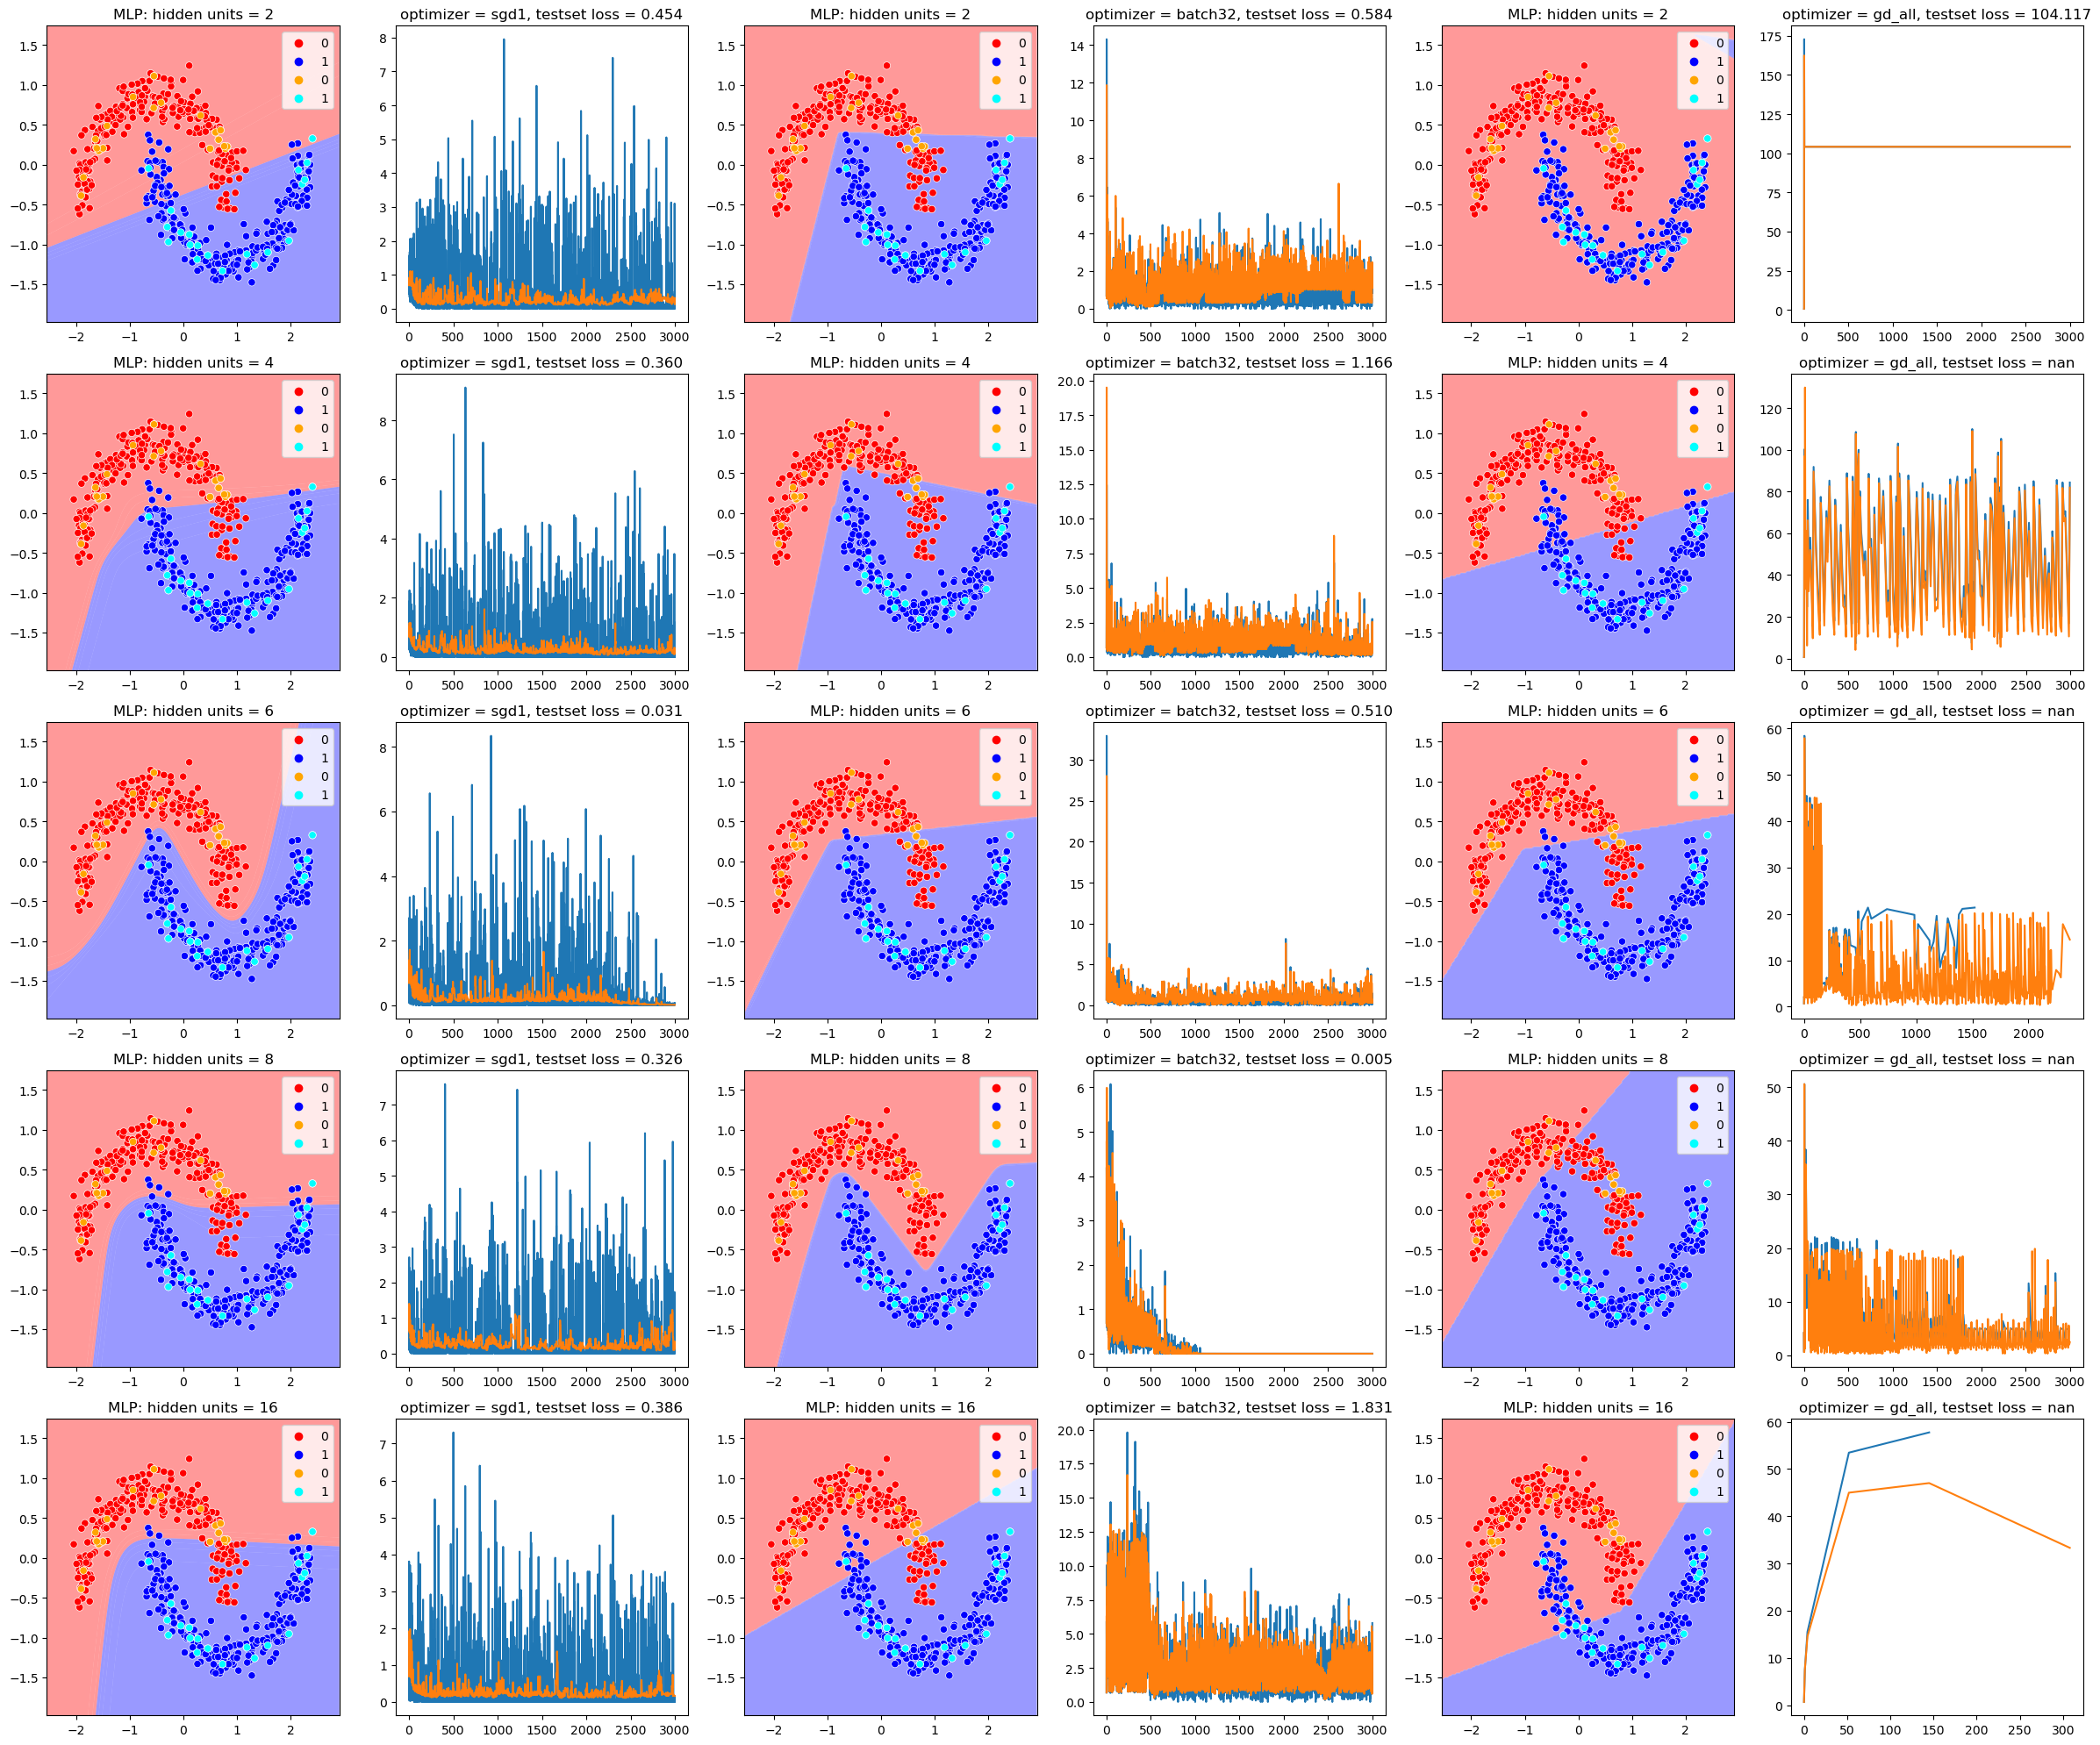

In [891]:
fig, axes = plt.subplots(5, 6, figsize=(24, 20))

hs = [2, 4, 6, 8, 16]
opts = ['sgd1', 'batch32', 'gd_all']

for i, opt in enumerate(opts):
    i = i*2
    for ax, h in zip(axes, hs):
        mlp = MLPMultivariate(h=h, o=1, epochs=3000, eta=0.0001, optimizer=opt).fit(X_train, y_train[..., None], val_X=X_val, val_y=y_val[..., None])
        _, y_pred = mlp.feedforward(D)
        ax[i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'], ax=ax[i])
        sns.scatterplot(x=X_val[:, 0], y=X_val[:, 1], hue=y_val, palette=['orange', 'cyan'], ax=ax[i])
        sns.lineplot(x=range(len(mlp.train_loss)), y=mlp.train_loss, ax=ax[i+1])
        sns.lineplot(x=range(len(mlp.val_loss)), y=mlp.val_loss, ax=ax[i+1])
        ax[i].set_title(f"MLP: hidden units = {h}")
        _, y_pred = mlp.feedforward(X_test)
        loss = MLP.cross_entropy(y_test[..., None], y_pred.T).sum() / y_test.shape[0] 
        ax[i+1].set_title(f"optimizer = {opt}{mlp.batch_size if opt == 'batch' else ''}, testset loss = {loss:.3f}")

plt.tight_layout()

## Sklearn usage

((360, 2), (100, 2), (40, 2), (360,), (100,), (40,))

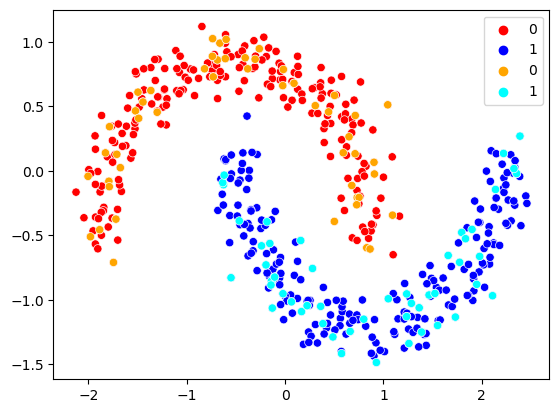

In [31]:
from sklearn.datasets import load_breast_cancer, make_circles, make_moons
from sklearn.model_selection import train_test_split

# X, y = make_circles(n_samples=500, noise=0.1, factor=.4)

X, y = make_moons(n_samples=500, noise=0.1)

# dataset = load_breast_cancer()
# X = dataset.data
# y = dataset.target

X = (X - X.mean()) / X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1, stratify=y_train)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 200),
    np.linspace(ymin-.5, ymax+.5, 200)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janba\anaconda3\envs\kt

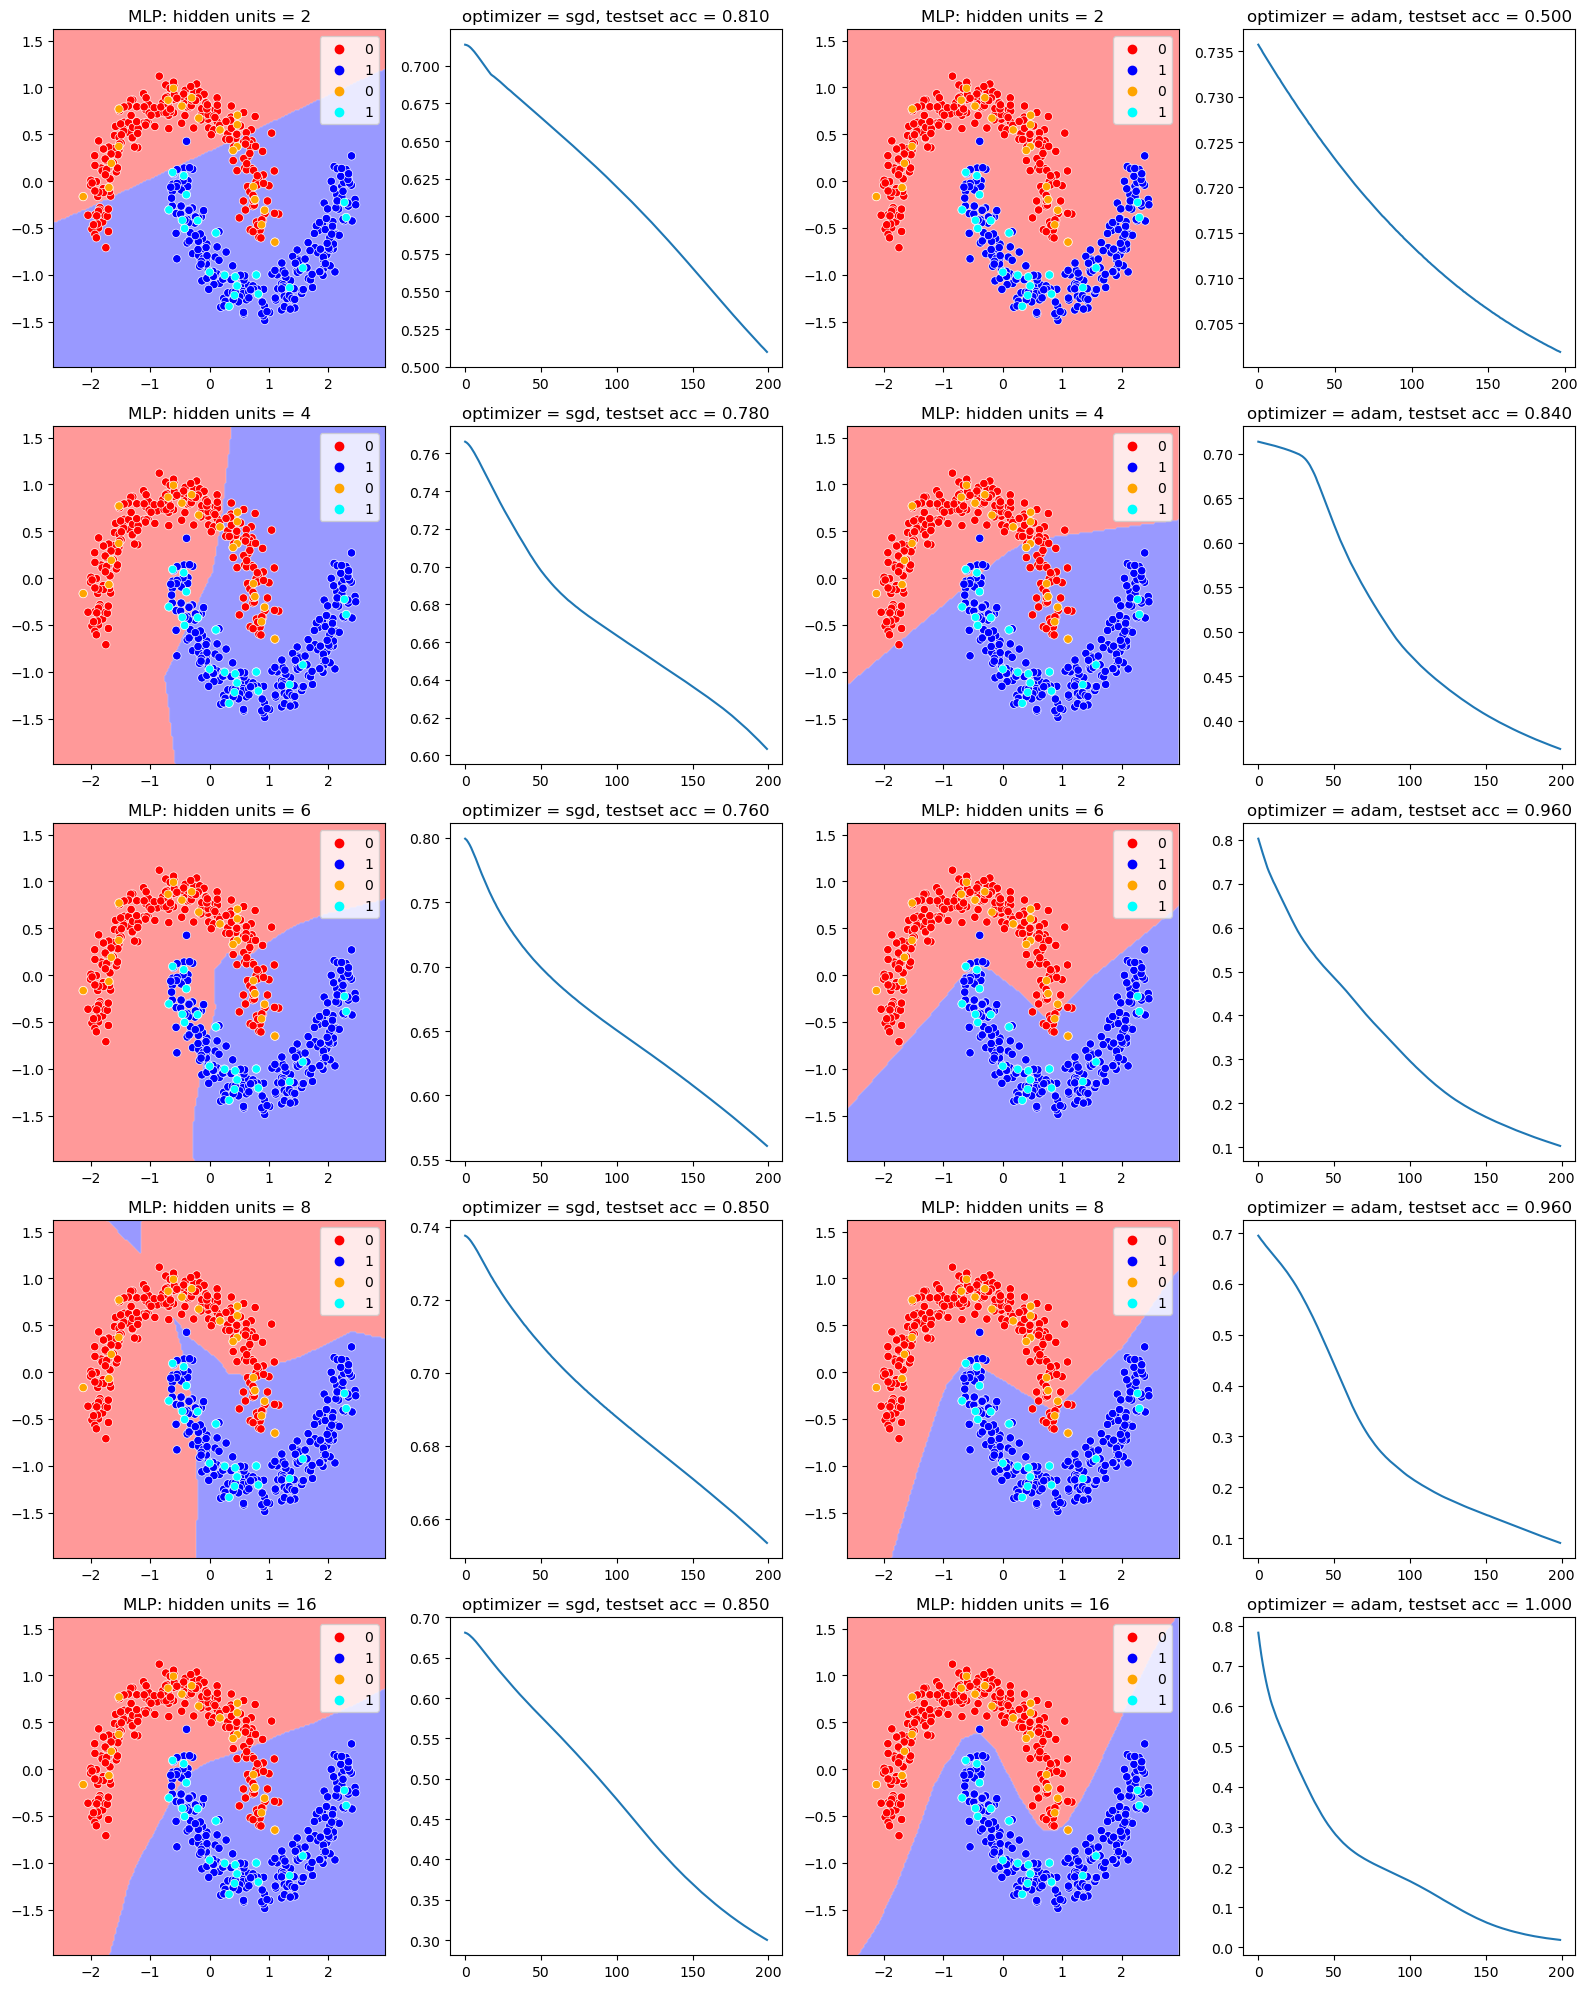

In [32]:
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(5, 4, figsize=(16, 20))

hs = [2, 4, 6, 8, 16, 24]
opts = ['sgd', 'adam']

for i, opt in enumerate(opts):
    i = i*2
    for ax, h in zip(axes, hs):
        mlp = MLPClassifier((h, h*2, h), solver=opt).fit(X_train, y_train)
        y_pred = mlp.predict(D)
        ax[i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['r', 'b'], ax=ax[i])
        sns.scatterplot(x=X_val[:, 0], y=X_val[:, 1], hue=y_val, palette=['orange', 'cyan'], ax=ax[i])
        sns.lineplot(x=range(len(mlp.loss_curve_)), y=mlp.loss_curve_, ax=ax[i+1])
        ax[i].set_title(f"MLP: hidden units = {h}")
        acc = mlp.score(X_test, y_test)
        ax[i+1].set_title(f"optimizer = {opt}{mlp.batch_size if opt == 'batch' else ''}, testset acc = {acc:.3f}")

plt.tight_layout()

## MLP Iris dataset

In [76]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dataset = load_iris()
X_names = dataset.feature_names
y_names = dataset.target_names

X = dataset.data
y = dataset.target

X = (X - X.mean()) / X.std()

# one-hot encoding
# y = np.eye(y.max()+1)[y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=[10], max_iter=3000).fit(X_train, y_train)
mlp.score(X_test, y_test)

1.0

In [85]:
[c.shape for c in mlp.coefs_] 

[(4, 10), (10, 3)]

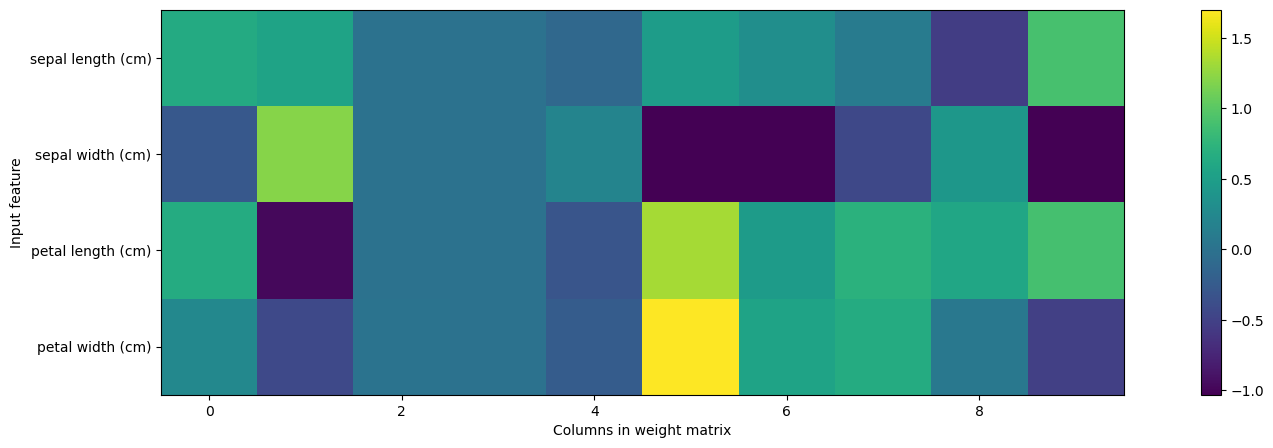

In [86]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(X_names)), X_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

### Iris paired variable MLPs

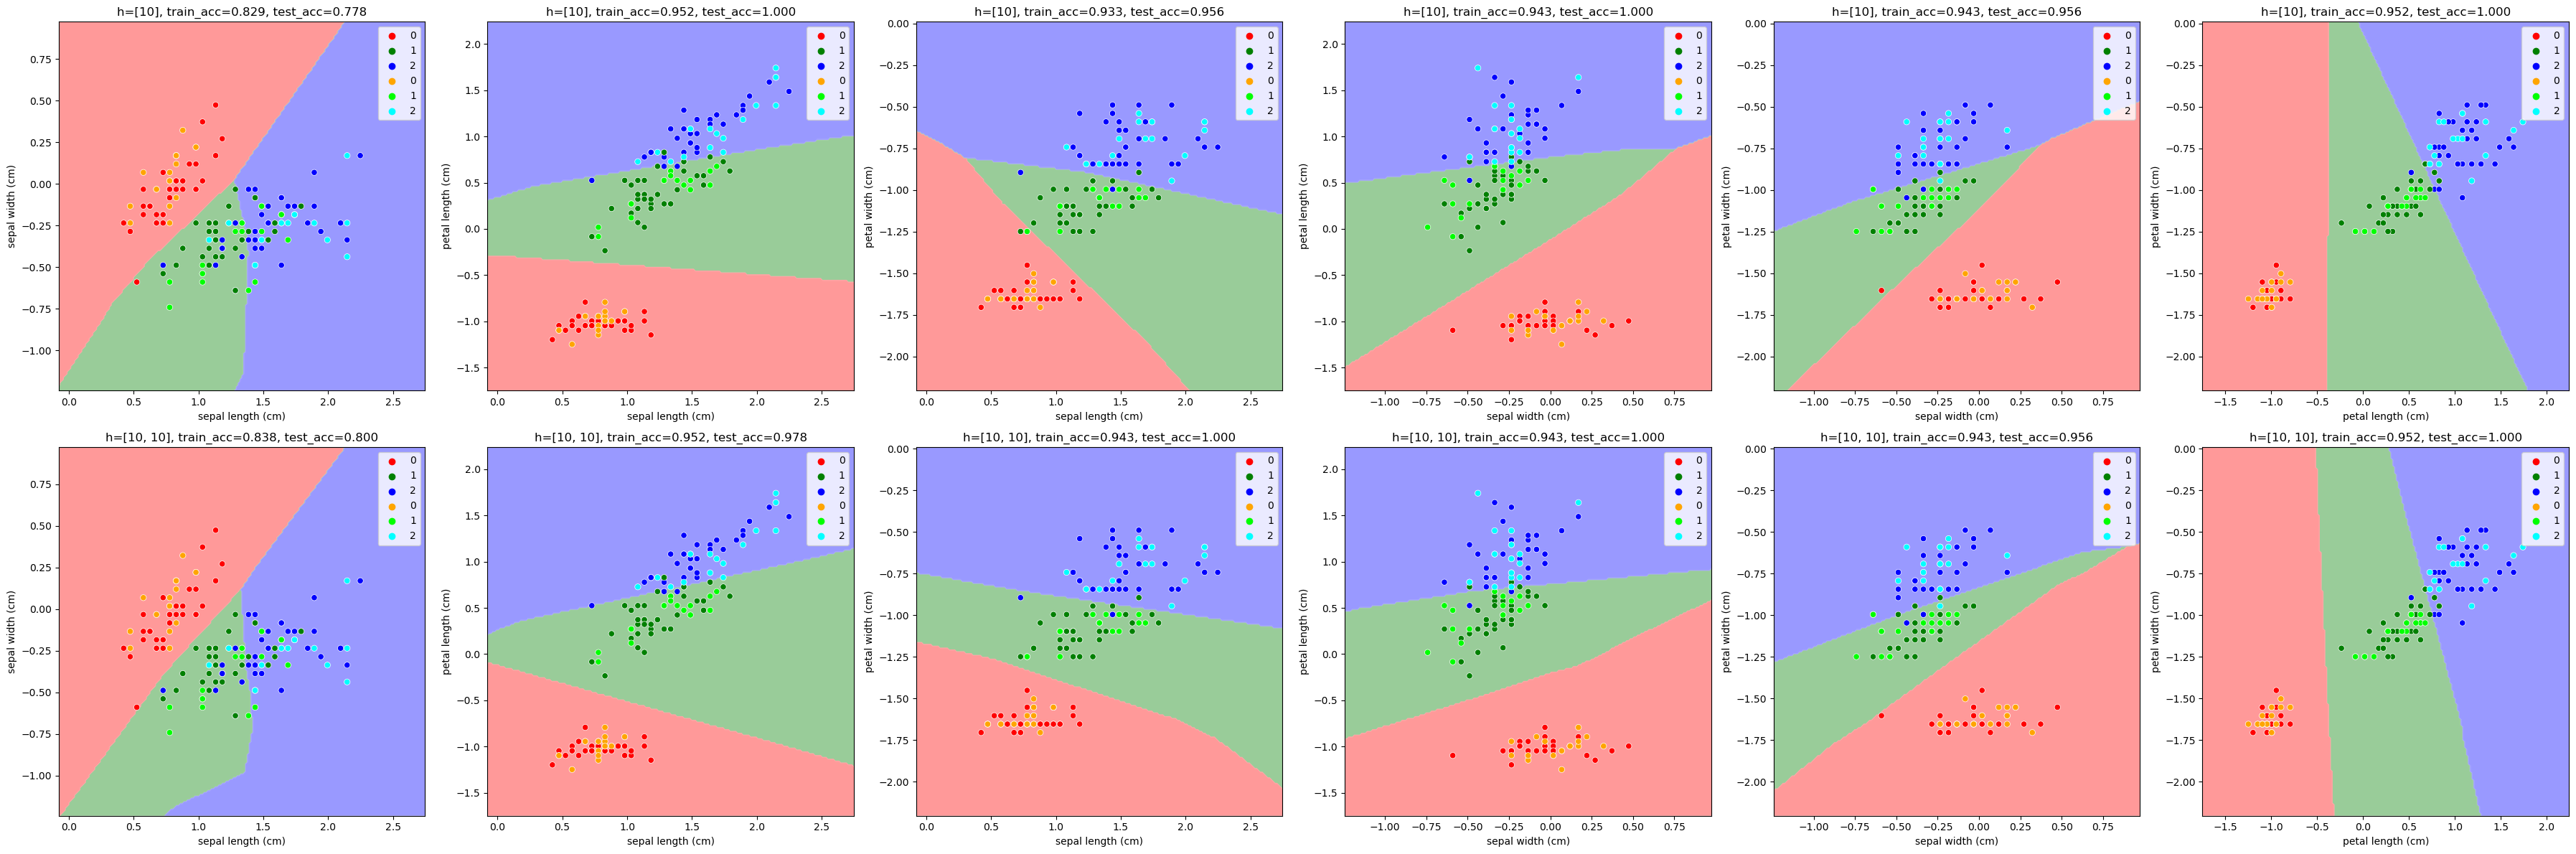

In [93]:
from itertools import combinations

cmap3 = ListedColormap(['red', 'green', 'blue'])

fig, axes = plt.subplots(2, 6, figsize=(36, 12))

layers_param = [
    [10],
    [10, 10]
] 

for i, (i1, i2) in enumerate(combinations(range(X.shape[1]), 2)):
    # idx = l
    xmin = X[:, i1].min(); xmax = X[:, i1].max()
    ymin = X[:, i2].min(); ymax = X[:, i2].max()
    xx, yy = np.meshgrid(
        np.linspace(xmin-.5, xmax+.5, 200),
        np.linspace(ymin-.5, ymax+.5, 200)
    )
    D = np.vstack((xx.flatten(), yy.flatten())).T

    for j, h in enumerate(layers_param):
        mlp = MLPClassifier(hidden_layer_sizes=h, max_iter=3000).fit(X_train[:, [i1, i2]], y_train)
        y_pred = mlp.predict(D)
        axes[j][i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap3, alpha=0.4, antialiased=True)
        sns.scatterplot(x=X_train[:, i1].ravel(), y=X_train[:, i2].ravel(), hue=y_train, palette=['r', 'g', 'b'], ax=axes[j][i])
        sns.scatterplot(x=X_test[:, i1].ravel(), y=X_test[:, i2].ravel(), hue=y_test, palette=['orange', 'lime', 'cyan'], ax=axes[j][i])
        train_acc = mlp.score(X_train[:, [i1, i2]], y_train)
        test_acc = mlp.score(X_test[:, [i1, i2]], y_test)
        axes[j][i].set_title(f"{h=}, {train_acc=:.3f}, {test_acc=:.3f}")
        axes[j][i].set_xlabel(X_names[i1])
        axes[j][i].set_ylabel(X_names[i2])
     
plt.tight_layout()
    

### MLP vs SVM 

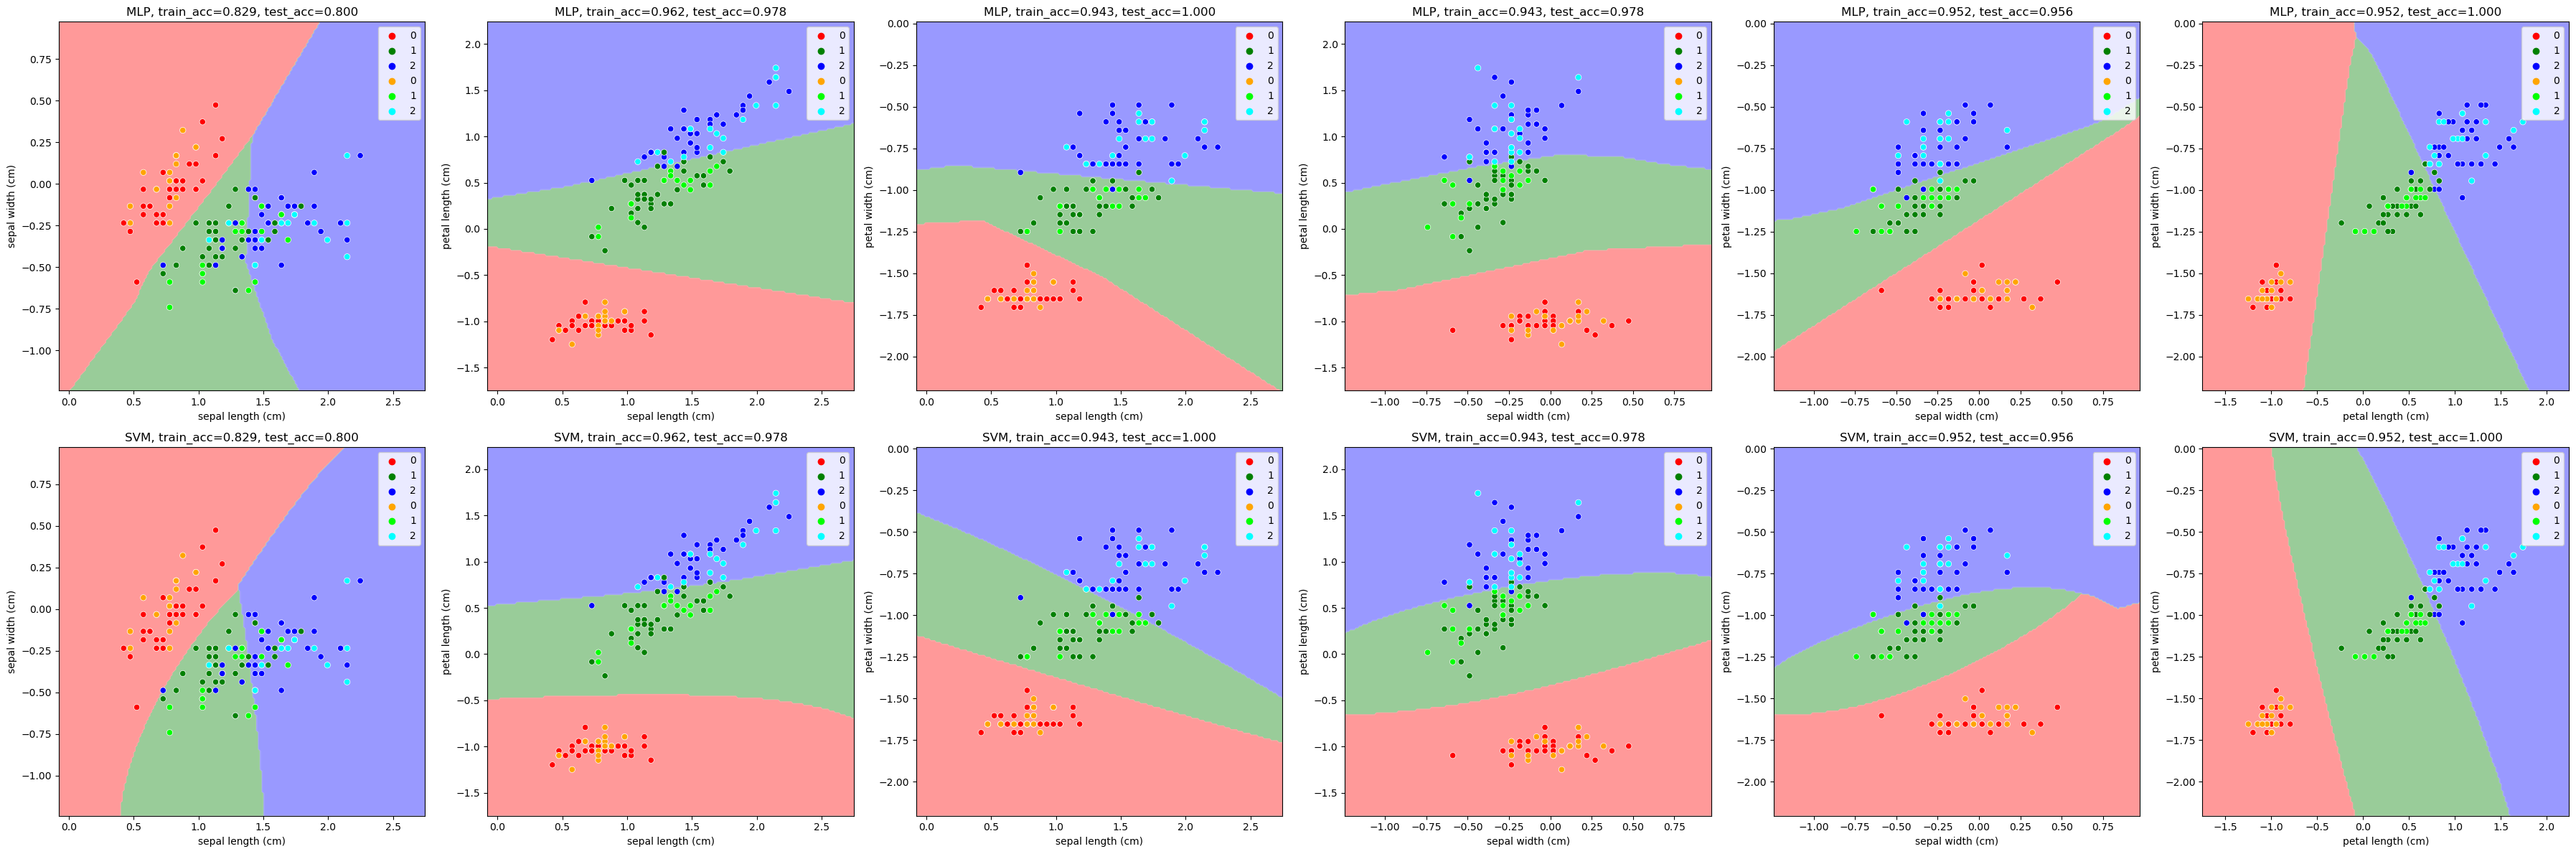

In [94]:
from itertools import combinations
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

cmap3 = ListedColormap(['red', 'green', 'blue'])

fig, axes = plt.subplots(2, 6, figsize=(36, 12))

for i, (i1, i2) in enumerate(combinations(range(X.shape[1]), 2)):

    xmin = X[:, i1].min(); xmax = X[:, i1].max()
    ymin = X[:, i2].min(); ymax = X[:, i2].max()
    xx, yy = np.meshgrid(
        np.linspace(xmin-.5, xmax+.5, 200),
        np.linspace(ymin-.5, ymax+.5, 200)
    )
    D = np.vstack((xx.flatten(), yy.flatten())).T

    mlp = MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=3000).fit(X_train[:, [i1, i2]], y_train)
    y_pred = mlp.predict(D)
    axes[0][i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap3, alpha=0.4, antialiased=True)
    sns.scatterplot(x=X_train[:, i1].ravel(), y=X_train[:, i2].ravel(), hue=y_train, palette=['r', 'g', 'b'], ax=axes[0][i])
    sns.scatterplot(x=X_test[:, i1].ravel(), y=X_test[:, i2].ravel(), hue=y_test, palette=['orange', 'lime', 'cyan'], ax=axes[0][i])
    train_acc = mlp.score(X_train[:, [i1, i2]], y_train)
    test_acc = mlp.score(X_test[:, [i1, i2]], y_test)
    axes[0][i].set_title(f"MLP, {train_acc=:.3f}, {test_acc=:.3f}")
    axes[0][i].set_xlabel(X_names[i1])
    axes[0][i].set_ylabel(X_names[i2])

    svm = SVC(kernel='rbf', max_iter=3000).fit(X_train[:, [i1, i2]], y_train)
    y_pred = svm.predict(D)
    axes[1][i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap3, alpha=0.4, antialiased=True)
    sns.scatterplot(x=X_train[:, i1].ravel(), y=X_train[:, i2].ravel(), hue=y_train, palette=['r', 'g', 'b'], ax=axes[1][i])
    sns.scatterplot(x=X_test[:, i1].ravel(), y=X_test[:, i2].ravel(), hue=y_test, palette=['orange', 'lime', 'cyan'], ax=axes[1][i])
    train_acc = mlp.score(X_train[:, [i1, i2]], y_train)
    test_acc = mlp.score(X_test[:, [i1, i2]], y_test)
    axes[1][i].set_title(f"SVM, {train_acc=:.3f}, {test_acc=:.3f}")
    axes[1][i].set_xlabel(X_names[i1])
    axes[1][i].set_ylabel(X_names[i2])
     
plt.tight_layout()
    